# NYC Yellow Taxi Trip Analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
import csv
import sqlite3
import time
from sklearn import cluster
from sklearn import feature_selection, linear_model
from mpl_toolkits.basemap import Basemap
from geopy.distance import vincenty, great_circle
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

### Monthly data analysis

Here we look at the number of trips recorded by NYC Yellow taxis on a monthly basis. Records for 2013, 2014, and 2015 are analyzed. We also look at the number of Uber trips for the months of April to September 2014.

In [2]:
count_list_2013 = []
for i in range(12):
    file_path = '../nyc_taxi_files/trip_data_files/trip_data_%d.csv' %(i+1)
    print file_path
    trip_data_file = open(file_path, 'r')
    trip_data = csv.reader(trip_data_file)
    
    count = 0
    for j in trip_data:
        count+=1
    count_list_2013.append(count)
    trip_data_file.close()
    print count

print count_list_2013

../nyc_taxi_files/trip_data_files/trip_data_1.csv
14776616
../nyc_taxi_files/trip_data_files/trip_data_2.csv
13990177
../nyc_taxi_files/trip_data_files/trip_data_3.csv
15749229
../nyc_taxi_files/trip_data_files/trip_data_4.csv
15100469
../nyc_taxi_files/trip_data_files/trip_data_5.csv
15285050
../nyc_taxi_files/trip_data_files/trip_data_6.csv
14385457
../nyc_taxi_files/trip_data_files/trip_data_7.csv
13823841
../nyc_taxi_files/trip_data_files/trip_data_8.csv
12597110
../nyc_taxi_files/trip_data_files/trip_data_9.csv
14107694
../nyc_taxi_files/trip_data_files/trip_data_10.csv
15004557
../nyc_taxi_files/trip_data_files/trip_data_11.csv
14388452
../nyc_taxi_files/trip_data_files/trip_data_12.csv
13971119
[14776616, 13990177, 15749229, 15100469, 15285050, 14385457, 13823841, 12597110, 14107694, 15004557, 14388452, 13971119]


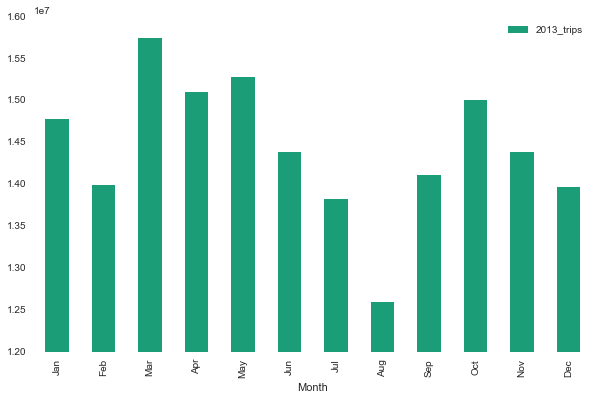

In [18]:
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
count_df=DataFrame(data=month_list, index=range(12), columns=['Month'])
count_df['2013_trips']=count_list_2013
count_df.plot(x='Month',y='2013_trips',kind='bar',ylim=(1.2e7, 1.6e7))

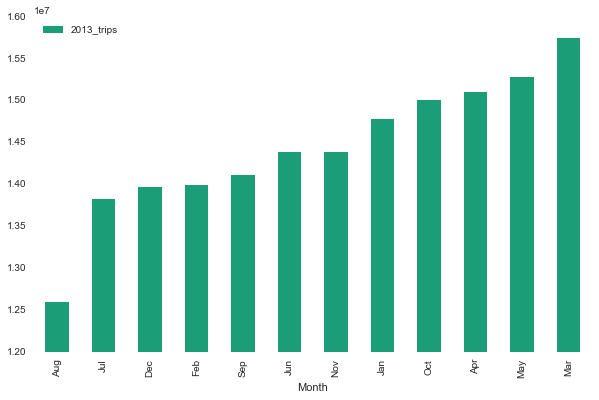

In [6]:
count_df_sorted=count_df.sort_values(by='2013_trips')
count_df_sorted.plot(x='Month',y='2013_trips',kind='bar',ylim=(1.2e7, 1.6e7))

In [7]:
count_list_2014 = []
for i in range(12):
    file_path = '../nyc_taxi_files/2014-data/yellow_tripdata_2014-%02d.csv' %(i+1)
    print file_path
    trip_data_file = open(file_path, 'r')
    trip_data = csv.reader(trip_data_file)
    
    count = 0
    for j in trip_data:
        count+=1
    count_list_2014.append(count)
    trip_data_file.close()
    print count

print count_list_2014

../nyc_taxi_files/2014-data/yellow_tripdata_2014-01.csv
13782494
../nyc_taxi_files/2014-data/yellow_tripdata_2014-02.csv
13063793
../nyc_taxi_files/2014-data/yellow_tripdata_2014-03.csv
15428129
../nyc_taxi_files/2014-data/yellow_tripdata_2014-04.csv
14618761
../nyc_taxi_files/2014-data/yellow_tripdata_2014-05.csv
14774043
../nyc_taxi_files/2014-data/yellow_tripdata_2014-06.csv
13813031
../nyc_taxi_files/2014-data/yellow_tripdata_2014-07.csv
13106367
../nyc_taxi_files/2014-data/yellow_tripdata_2014-08.csv
12688879
../nyc_taxi_files/2014-data/yellow_tripdata_2014-09.csv
13374018
../nyc_taxi_files/2014-data/yellow_tripdata_2014-10.csv
14232489
../nyc_taxi_files/2014-data/yellow_tripdata_2014-11.csv
13218218
../nyc_taxi_files/2014-data/yellow_tripdata_2014-12.csv
13014163
[13782494, 13063793, 15428129, 14618761, 14774043, 13813031, 13106367, 12688879, 13374018, 14232489, 13218218, 13014163]


In [8]:
count_list_2015 = []
for i in range(12):
    file_path = '../nyc_taxi_files/2015-data/yellow_tripdata_2015-%02d.csv' %(i+1)
    print file_path
    trip_data_file = open(file_path, 'r')
    trip_data = csv.reader(trip_data_file)
    
    count = 0
    for j in trip_data:
        count+=1
    count_list_2015.append(count)
    trip_data_file.close()
    print count

print count_list_2015

../nyc_taxi_files/2015-data/yellow_tripdata_2015-01.csv
12748987
../nyc_taxi_files/2015-data/yellow_tripdata_2015-02.csv
12450522
../nyc_taxi_files/2015-data/yellow_tripdata_2015-03.csv
13351610
../nyc_taxi_files/2015-data/yellow_tripdata_2015-04.csv
13071790
../nyc_taxi_files/2015-data/yellow_tripdata_2015-05.csv
13158263
../nyc_taxi_files/2015-data/yellow_tripdata_2015-06.csv
12324936
../nyc_taxi_files/2015-data/yellow_tripdata_2015-07.csv
11562784
../nyc_taxi_files/2015-data/yellow_tripdata_2015-08.csv
11130305
../nyc_taxi_files/2015-data/yellow_tripdata_2015-09.csv
11225064
../nyc_taxi_files/2015-data/yellow_tripdata_2015-10.csv
12315489
../nyc_taxi_files/2015-data/yellow_tripdata_2015-11.csv
11312677
../nyc_taxi_files/2015-data/yellow_tripdata_2015-12.csv
11460574
[12748987, 12450522, 13351610, 13071790, 13158263, 12324936, 11562784, 11130305, 11225064, 12315489, 11312677, 11460574]


In [19]:
count_df['2014_trips'] = count_list_2014
count_df['2015_trips'] = count_list_2015

count_df

Month  2013_trips  2014_trips  2015_trips
0    Jan    14776616    13782494    12748987
1    Feb    13990177    13063793    12450522
2    Mar    15749229    15428129    13351610
3    Apr    15100469    14618761    13071790
4    May    15285050    14774043    13158263
5    Jun    14385457    13813031    12324936
6    Jul    13823841    13106367    11562784
7    Aug    12597110    12688879    11130305
8    Sep    14107694    13374018    11225064
9    Oct    15004557    14232489    12315489
10   Nov    14388452    13218218    11312677
11   Dec    13971119    13014163    11460574

In [25]:
Uber_data_months = ['Apr','May','Jun','Jul','Aug','Sep']

count_df['2014_Uber_trips'] = 0

for month in Uber_data_months:
    file_path = '../nyc_taxi_files/uber-trip-data/uber-raw-data-%s14.csv' %(month.lower())
    print file_path
    trip_data_file = open(file_path, 'r')
    trip_data = csv.reader(trip_data_file)
    
    count = 0
    for j in trip_data:
        count+=1
    
    count_df.loc[count_df['Month'] == month, '2014_Uber_trips'] = count
    trip_data_file.close()

count_df

../nyc_taxi_files/uber-trip-data/uber-raw-data-apr14.csv
../nyc_taxi_files/uber-trip-data/uber-raw-data-may14.csv
../nyc_taxi_files/uber-trip-data/uber-raw-data-jun14.csv
../nyc_taxi_files/uber-trip-data/uber-raw-data-jul14.csv
../nyc_taxi_files/uber-trip-data/uber-raw-data-aug14.csv
../nyc_taxi_files/uber-trip-data/uber-raw-data-sep14.csv


Month  2013_trips  2014_trips  2015_trips  2014_Uber_trips
0    Jan    14776616    13782494    12748987                0
1    Feb    13990177    13063793    12450522                0
2    Mar    15749229    15428129    13351610                0
3    Apr    15100469    14618761    13071790           564517
4    May    15285050    14774043    13158263           652436
5    Jun    14385457    13813031    12324936           663845
6    Jul    13823841    13106367    11562784           796122
7    Aug    12597110    12688879    11130305           829276
8    Sep    14107694    13374018    11225064          1028137
9    Oct    15004557    14232489    12315489                0
10   Nov    14388452    13218218    11312677                0
11   Dec    13971119    13014163    11460574                0

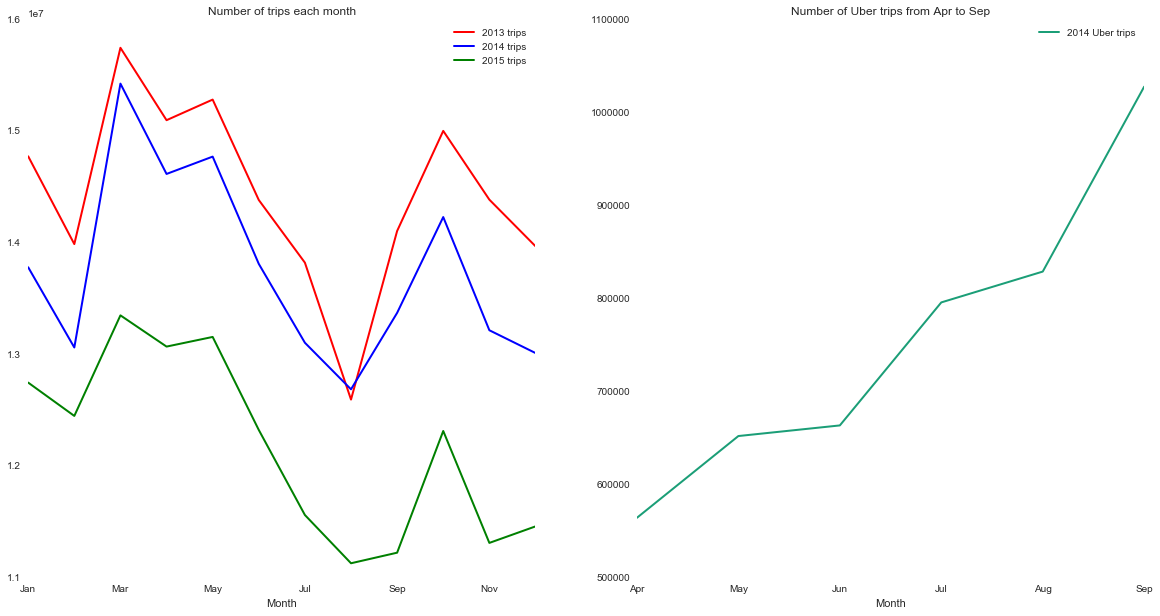

In [50]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(121)
count_df.plot(x='Month', y='2013_trips', kind='line', color = 'red', ax=ax1, label='2013 trips')
count_df.plot(x='Month', y='2014_trips', kind='line', color = 'blue', ax=ax1, label='2014 trips')
count_df.plot(x='Month', y='2015_trips', kind='line', color = 'green', ax=ax1, label='2015 trips')

ax1.set(title='Number of trips each month')

ax2 = plt.subplot(122)
count_df[count_df.Month.isin(['Apr','May','Jun','Jul','Aug','Sep'])].plot(x='Month', y='2014_Uber_trips', kind='line', 
                                                                          ax=ax2, label='2014 Uber trips')
ax2.set(title='Number of Uber trips from Apr to Sep')

### Trip data analysis for a single month

The following code reads in the January data for 2013 contained in two different files. Both files contain the records corresponding to the same trips and so a plain merge using the primary keys of 'medallion','hack_license','vendor_id', and 'pickup_datetime' will yield a unique record on both these datasets.

In [201]:
%%time

trip_data_file=pd.read_csv('../nyc_taxi_files/trip_data_files/trip_data_1.csv')
trip_fare_file=pd.read_csv('../nyc_taxi_files/trip_data_files/trip_fare_1.csv')

Wall time: 9min 8s


In [202]:
trip_data_file.columns

Index([u'medallion', u'hack_license', u'vendor_id', u'rate_code',
       u'store_and_fwd_flag', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'trip_time_in_secs', u'trip_distance',
       u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',
       u'dropoff_latitude'],
      dtype='object')

In [3]:
trip_fare_file.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' pickup_datetime',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

In [4]:
trip_fare_file.rename(columns={' hack_license':'hack_license',' vendor_id':'vendor_id',' pickup_datetime':'pickup_datetime',\
                               ' payment_type':'payment_type',' fare_amount':'fare_amount',' surcharge':'surcharge',\
                             ' mta_tax':'mta_tax', ' tip_amount':'tip_amount', ' tolls_amount':'tolls_amount', ' total_amount':'total_amount'}, 
                    inplace = True)

In [5]:
trip_fare_file.columns

Index([u'medallion', u'hack_license', u'vendor_id', u'pickup_datetime',
       u'payment_type', u'fare_amount', u'surcharge', u'mta_tax',
       u'tip_amount', u'tolls_amount', u'total_amount'],
      dtype='object')

In [6]:
# trip_data_file.groupby(['medallion']).count()
# trip_data_file.groupby(['medallion', 'hack_license']).count()
# trip_data_file.groupby(['medallion', 'hack_license', 'vendor_id']).count()
# trip_data_file.groupby(['medallion', 'hack_license', 'vendor_id','pickup_datetime']).count()

In [18]:
trip_data_file.tail()

medallion                      hack_license  \
14776610  B33E71CD9E8FE1BE3B70FEB6E807DD15  BAF57796E45D921BB23217E17A372FF6   
14776611  ED160B76D5349C8AC1ECF22CD4B8D538  3B93F6DA5DEBDE9560993FA624C4FF76   
14776612  D83F9AC0E33F6F19869C243BE6AB6FE5  85A55B6772275374EF90AC9457DC1F83   
14776613  04E59442A7DDBCE515E33CD355D866E7  7913172189931A1A1632562B10AB53C4   
14776614  D30BED60331C79E3F7ACD05B325ED42F  B5E1D2461A5BCC8819188DACEC17CD69   

         vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
14776610       CMT          1                  N  2013-01-06 04:58:23   
14776611       CMT          1                  N  2013-01-08 14:42:04   
14776612       CMT          1                  N  2013-01-10 13:29:23   
14776613       CMT          1                  N  2013-01-06 16:30:15   
14776614       CMT          1                  N  2013-01-05 20:38:46   

             dropoff_datetime  passenger_count  trip_time_in_secs  \
14776610  2013-01-06 05:11:24                1                781   
14776611  2013-01-08 14:50:27                1                503   
14776612  2013-01-10 13:34:45                1                321   
14776613  2013-01-06 16:42:26                1                730   
14776614  2013-01-05 20:43:06                1                260   

          trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  \
14776610            3.3        -73.989029        40.759327         -73.953743   
14776611            1.0        -73.993042        40.733990         -73.982483   
14776612            0.9        -73.979553        40.785011         -73.968262   
14776613            1.3        -73.968002        40.762161         -73.985992   
14776614            0.8        -73.982224        40.766670         -73.989212   

          dropoff_latitude  
14776610         40.770672  
14776611         40.724823  
14776612         40.788158  
14776613         40.770542  
14776614         40.773636

In [19]:
trip_fare_file.tail()

medallion                      hack_license  \
14776610  B33E71CD9E8FE1BE3B70FEB6E807DD15  BAF57796E45D921BB23217E17A372FF6   
14776611  ED160B76D5349C8AC1ECF22CD4B8D538  3B93F6DA5DEBDE9560993FA624C4FF76   
14776612  D83F9AC0E33F6F19869C243BE6AB6FE5  85A55B6772275374EF90AC9457DC1F83   
14776613  04E59442A7DDBCE515E33CD355D866E7  7913172189931A1A1632562B10AB53C4   
14776614  D30BED60331C79E3F7ACD05B325ED42F  B5E1D2461A5BCC8819188DACEC17CD69   

          vendor_id      pickup_datetime  payment_type   fare_amount  \
14776610        CMT  2013-01-06 04:58:23           CSH          13.0   
14776611        CMT  2013-01-08 14:42:04           CSH           7.5   
14776612        CMT  2013-01-10 13:29:23           CSH           6.0   
14776613        CMT  2013-01-06 16:30:15           CSH           9.5   
14776614        CMT  2013-01-05 20:38:46           CSH           5.0   

           surcharge   mta_tax   tip_amount   tolls_amount   total_amount  
14776610         0.5       0.5          0.0            0.0           14.0  
14776611         0.0       0.5          0.0            0.0            8.0  
14776612         0.0       0.5          0.0            0.0            6.5  
14776613         0.0       0.5          0.0            0.0           10.0  
14776614         0.5       0.5          0.0            0.0            6.0

In [7]:
%%time

trip_full_df=pd.DataFrame.merge(trip_data_file, trip_fare_file, 
                             on=['medallion','hack_license','vendor_id','pickup_datetime'])

Wall time: 5min 51s


We now add two more columns to the taxi data which are the hours of pickup and dropoff for a particular trip. The values of both these columns range from 0 to 23.

In [8]:
%%time

trip_full_df['pickup_hour']=trip_full_df['pickup_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_hour)
trip_full_df['dropoff_hour']=trip_full_df['dropoff_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_hour)

Wall time: 7min 52s


In [9]:
trip_full_df.head()

medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01-06 00:22:54                1                259            1.5   
2  2013-01-05 18:54:23                1                282            1.1   
3  2013-01-07 23:58:20                2                244            0.7   
4  2013-01-07 23:34:24                1                560            2.1   

       ...       dropoff_latitude  payment_type  fare_amount  surcharge  \
0      ...              40.751171           CSH          6.5        0.0   
1      ...              40.750660           CSH          6.0        0.5   
2      ...              40.726002           CSH          5.5        1.0   
3      ...              40.759388           CSH          5.0        0.5   
4      ...              40.747868           CSH          9.5        0.5   

  mta_tax  tip_amount  tolls_amount  total_amount  pickup_hour  dropoff_hour  
0     0.5         0.0           0.0           7.0           15            15  
1     0.5         0.0           0.0           7.0            0             0  
2     0.5         0.0           0.0           7.0           18            18  
3     0.5         0.0           0.0           6.0           23            23  
4     0.5         0.0           0.0          10.5           23            23  

[5 rows x 23 columns]

### Neighborhoods Data

We read in the neighborhood dataset available in Open NYC Data and extract the latitude and longitude values of each. We will later use this dataset to add another column in the taxi data.

In [8]:
%%time

neighborhood_df = pd.read_csv('../nyc_taxi_files/NHoodNameCentroids.csv')

Wall time: 171 ms


In [9]:
neighborhood_df.tail()

the_geom  OBJECTID             Name  \
294  POINT (-74.13792663771576 40.576506293794935)       295  Lighthouse Hill   
295  POINT (-74.22957080626948 40.519541457489126)       296  Richmond Valley   
296   POINT (-73.8266775713865 40.790601556701525)       297            Malba   
297    POINT (-73.8902809854761 40.68248551101694)       298    Highland Park   
298    POINT (-73.948415153289 40.609377701137696)       299          Madison   

     Stacked   AnnoLine1 AnnoLine2 AnnoLine3  AnnoAngle        Borough  
294        2  Lighthouse      Hill       NaN          0  Staten Island  
295        2    Richmond    Valley       NaN          0  Staten Island  
296        1       Malba       NaN       NaN          0         Queens  
297        2    Highland      Park       NaN          0       Brooklyn  
298        1     Madison       NaN       NaN          0       Brooklyn

We can extract the latitude and longitude information from the <b> 'the_geom' </b> parameter in the neighborhood dataset.

In [10]:
%%time

neighborhood_df['longitude']=neighborhood_df['the_geom'].apply(lambda x: (x[7: -1]).split(' ')[0])
neighborhood_df['latitude']=neighborhood_df['the_geom'].apply(lambda x: (x[7: -1]).split(' ')[1])

Wall time: 2 ms


In [17]:
neighborhood_df.to_csv('../nyc_taxi_files/NYC_Neighborhoods_full.csv',index=False)

In [3]:
neighborhood_df = pd.read_csv('../nyc_taxi_files/NYC_Neighborhoods_full.csv')

In [59]:
neighborhood_df['longitude'] = neighborhood_df['longitude'].astype(float)
neighborhood_df['latitude'] = neighborhood_df['latitude'].astype(float)

In [4]:
neighborhood_df.head()

the_geom  OBJECTID         Name  \
0    POINT (-73.8472005205491 40.89470517661004)         1    Wakefield   
1   POINT (-73.82993910812405 40.87429419303015)         2   Co-op City   
2   POINT (-73.82780644716419 40.88755567735082)         3  Eastchester   
3  POINT (-73.90564259591689 40.895437426903875)         4    Fieldston   
4   POINT (-73.91258546108577 40.89083449389134)         5    Riverdale   

   Stacked    AnnoLine1 AnnoLine2 AnnoLine3  AnnoAngle Borough  longitude  \
0        1    Wakefield       NaN       NaN          0   Bronx -73.847201   
1        2        Co-op      City       NaN          0   Bronx -73.829939   
2        1  Eastchester       NaN       NaN          0   Bronx -73.827806   
3        1    Fieldston       NaN       NaN          0   Bronx -73.905643   
4        1    Riverdale       NaN       NaN          0   Bronx -73.912585   

    latitude  
0  40.894705  
1  40.874294  
2  40.887556  
3  40.895437  
4  40.890834

### Back to Taxi trip analysis

We continue with more exploratory analysis and visualizations of the Taxi trip dataset. We look at how no of trips vary by hour of day and day of week.

In [11]:
%%time

trip_full_df['fare_amount'] = trip_full_df['fare_amount'].astype(float)
trip_full_df['tip_fraction'] = trip_full_df['tip_amount']/trip_full_df['fare_amount']
# print trip_full_df.groupby('medallion')['tip_fraction'].mean().sort_values(ascending=False).head()

Wall time: 4.74 s


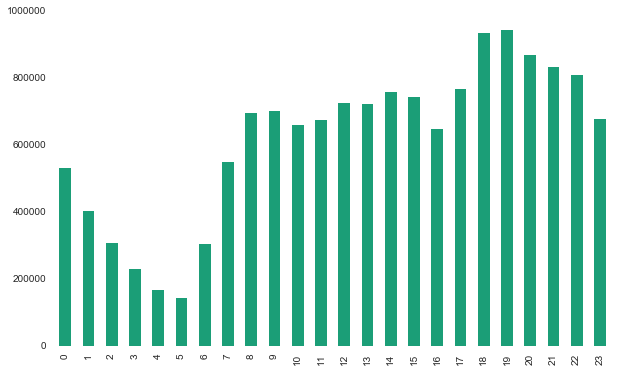

In [12]:
trip_full_df.pickup_hour.groupby(trip_full_df.pickup_hour.values).size().plot(kind='bar')

In [12]:
%%time

trip_full_df['pickup_wday'] = trip_full_df['pickup_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_wday)

Wall time: 3min 57s


In [13]:
%%time

trip_full_df['pickup_day'] = trip_full_df['pickup_wday'].map({0:'Monday', 1:'Tuesday',2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
# trip_Pickup_day_group = trip_Pickup_day.groupby(trip_Pickup_day.values).count()
# trip_Pickup_wday_group = pd.DataFrame(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
#                                   data=trip_Pickup_day_group.values, columns=['No_of_trips'])

# print trip_Pickup_day_group
# trip_Pickup_wday_group.No_of_trips.plot(kind='bar')

Wall time: 51.5 s


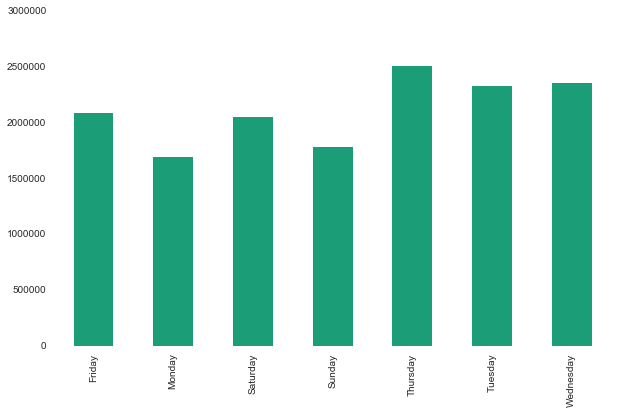

In [15]:
trip_full_df['pickup_day'].groupby(trip_full_df.pickup_day.values).size().plot(kind='bar')

In [14]:
%%time

trip_full_df['full_date'] = trip_full_df['pickup_datetime'].apply(lambda x: x.split(" ")[0])

Wall time: 12.3 s


Wall time: 3min 56s


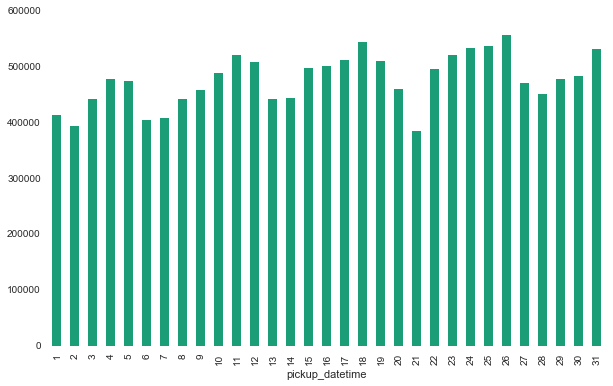

In [22]:
%%time

trip_pickup_date = trip_full_df['pickup_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_mday)
trip_pickup_date.unique()
trip_pickup_date.groupby(trip_pickup_date).size().plot(kind='bar')

In [15]:
trip_full_df.head()

medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01-06 00:22:54                1                259            1.5   
2  2013-01-05 18:54:23                1                282            1.1   
3  2013-01-07 23:58:20                2                244            0.7   
4  2013-01-07 23:34:24                1                560            2.1   

      ...      surcharge  mta_tax  tip_amount  tolls_amount total_amount  \
0     ...            0.0      0.5         0.0           0.0          7.0   
1     ...            0.5      0.5         0.0           0.0          7.0   
2     ...            1.0      0.5         0.0           0.0          7.0   
3     ...            0.5      0.5         0.0           0.0          6.0   
4     ...            0.5      0.5         0.0           0.0         10.5   

   pickup_hour  dropoff_hour  pickup_wday  pickup_day   full_date  
0           15            15            1     Tuesday  2013-01-01  
1            0             0            6      Sunday  2013-01-06  
2           18            18            5    Saturday  2013-01-05  
3           23            23            0      Monday  2013-01-07  
4           23            23            0      Monday  2013-01-07  

[5 rows x 26 columns]

In [26]:
%%time

tripdata_jan21 = trip_full_df[trip_full_df.full_date == '2013-01-21']

Wall time: 34 s


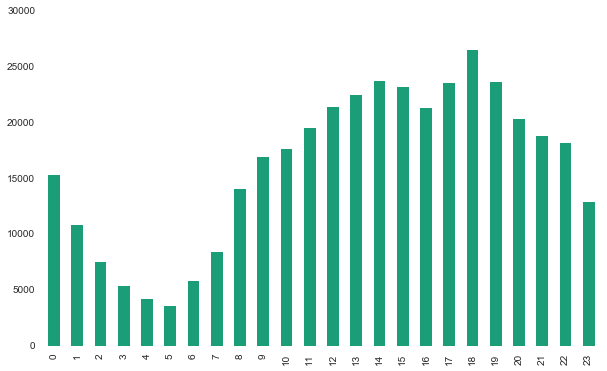

In [27]:
tripdata_jan21['pickup_hour'].groupby(tripdata_jan21['pickup_hour'].values).size().plot(kind='bar')

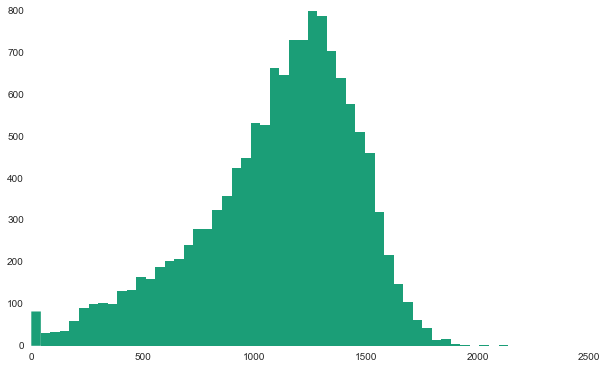

In [31]:
trip_full_df.groupby(['medallion']).size().hist(bins=50)

In [16]:
%%time

trip_df_nonzero = trip_full_df[trip_full_df.trip_distance.astype(float) != 0]

Wall time: 24min 45s


In [47]:
# tripdata_ind_driver_filtered = tripdata_ind_driver[tripdata_ind_driver.values > 5]
# tripdata_ind_driver_filtered.hist(bins=50)

In [34]:
trip_full_df.describe()

C:\Users\Anirban\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


rate_code  passenger_count  trip_time_in_secs  trip_distance  \
count  1.477662e+07     1.477662e+07       1.477662e+07   1.477662e+07   
mean   1.034273e+00     1.697372e+00       6.834236e+02   2.770976e+00   
std    3.387715e-01     1.365396e+00       4.944063e+02   3.305923e+00   
min    0.000000e+00     0.000000e+00       0.000000e+00   0.000000e+00   
25%    1.000000e+00     1.000000e+00       3.600000e+02   1.000000e+00   
50%    1.000000e+00     1.000000e+00       5.540000e+02   1.700000e+00   
75%    1.000000e+00     2.000000e+00       8.850000e+02   3.060000e+00   
max    2.100000e+02     2.550000e+02       1.080000e+04   1.000000e+02   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      1.477662e+07     1.477662e+07       1.477653e+07      1.477653e+07   
mean      -7.263634e+01     4.001440e+01      -7.259443e+01      3.999219e+01   
std        1.013819e+01     7.789904e+00       1.028860e+01      7.537067e+00   
min       -2.771285e+03    -3.547921e+03      -2.350956e+03     -3.547921e+03   
25%       -7.399188e+01     4.073551e+01                NaN               NaN   
50%       -7.398166e+01     4.075315e+01                NaN               NaN   
75%       -7.396684e+01     4.076729e+01                NaN               NaN   
max        1.124042e+02     3.310365e+03       2.228738e+03      3.477106e+03   

        fare_amount     surcharge       mta_tax    tip_amount  tolls_amount  \
count  1.477662e+07  1.477662e+07  1.477662e+07  1.477662e+07  1.477662e+07   
mean   1.166472e+01  3.204904e-01  4.983970e-01  1.267509e+00  2.018670e-01   
std    9.639219e+00  3.675741e-01  2.826541e-02  2.046084e+00  1.035481e+00   
min    2.500000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.500000e+00  0.000000e+00  5.000000e-01  0.000000e+00  0.000000e+00   
50%    9.000000e+00  0.000000e+00  5.000000e-01  8.000000e-01  0.000000e+00   
75%    1.300000e+01  5.000000e-01  5.000000e-01  2.000000e+00  0.000000e+00   
max    5.000000e+02  1.250000e+01  5.000000e-01  2.000000e+02  2.000000e+01   

       total_amount   pickup_hour  dropoff_hour   pickup_wday  
count  1.477662e+07  1.477662e+07  1.477662e+07  1.477662e+07  
mean   1.395298e+01  1.358165e+01  1.358404e+01  2.962503e+00  
std    1.146469e+01  6.401632e+00  6.461708e+00  1.895188e+00  
min    2.500000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    7.700000e+00  9.000000e+00  9.000000e+00  1.000000e+00  
50%    1.050000e+01  1.400000e+01  1.400000e+01  3.000000e+00  
75%    1.550000e+01  1.900000e+01  1.900000e+01  5.000000e+00  
max    6.500000e+02  2.300000e+01  2.300000e+01  6.000000e+00

In [17]:
trip_df_nonzero.head()

medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01-06 00:22:54                1                259            1.5   
2  2013-01-05 18:54:23                1                282            1.1   
3  2013-01-07 23:58:20                2                244            0.7   
4  2013-01-07 23:34:24                1                560            2.1   

      ...      surcharge  mta_tax  tip_amount  tolls_amount total_amount  \
0     ...            0.0      0.5         0.0           0.0          7.0   
1     ...            0.5      0.5         0.0           0.0          7.0   
2     ...            1.0      0.5         0.0           0.0          7.0   
3     ...            0.5      0.5         0.0           0.0          6.0   
4     ...            0.5      0.5         0.0           0.0         10.5   

   pickup_hour  dropoff_hour  tip_fraction  pickup_wday  pickup_day  
0           15            15           0.0            1     Tuesday  
1            0             0           0.0            6      Sunday  
2           18            18           0.0            5    Saturday  
3           23            23           0.0            0      Monday  
4           23            23           0.0            0      Monday  

[5 rows x 26 columns]

In [33]:
%%time

# Converting all location data to floats for easier analysis
trip_df_nonzero[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']] = \
trip_df_nonzero[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].astype(float)

# finding out no of records with no location information
trips_without_location = trip_df_nonzero[(trip_df_nonzero['pickup_longitude'] == 0) 
                                                                           | (trip_df_nonzero['pickup_latitude'] == 0)
                                                                          | (trip_df_nonzero['dropoff_longitude'] == 0)
                                                                             | (trip_df_nonzero['dropoff_latitude'] == 0)]

print 'No of rows with no location information = %d' %trips_without_location.shape[0]

No of rows with no location information = 285911
Wall time: 51.8 s


In [ ]:
%%time

trips_with_location = trip_df_nonzero[~((trip_df_nonzero['pickup_longitude'] == 0) 
                                                                           | (trip_df_nonzero['pickup_latitude'] == 0)
                                                                          | (trip_df_nonzero['dropoff_longitude'] == 0)
                                                                             | (trip_df_nonzero['dropoff_latitude'] == 0))]

In [50]:
trips_without_location[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
73                0.0              0.0                0.0               0.0
95                0.0              0.0                0.0               0.0
99                0.0              0.0                0.0               0.0
100               0.0              0.0                0.0               0.0
199               0.0              0.0                0.0               0.0

In [36]:
%%time

trips_without_location.to_csv('../nyc_taxi_files/2013_January_no_location.csv',index=False)

Wall time: 15.9 s


In [39]:
%%time

trips_with_location = trip_full_df[~((trip_full_df['pickup_longitude'] == 0) 
                                                                           | (trip_full_df['pickup_latitude'] == 0)
                                                                          | (trip_full_df['dropoff_longitude'] == 0)
                                                                             | (trip_full_df['dropoff_latitude'] == 0))]

Wall time: 12min 53s


In [40]:
trips_with_location.head()

medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01-06 00:22:54                1                259            1.5   
2  2013-01-05 18:54:23                1                282            1.1   
3  2013-01-07 23:58:20                2                244            0.7   
4  2013-01-07 23:34:24                1                560            2.1   

      ...      surcharge  mta_tax  tip_amount  tolls_amount total_amount  \
0     ...            0.0      0.5         0.0           0.0          7.0   
1     ...            0.5      0.5         0.0           0.0          7.0   
2     ...            1.0      0.5         0.0           0.0          7.0   
3     ...            0.5      0.5         0.0           0.0          6.0   
4     ...            0.5      0.5         0.0           0.0         10.5   

   pickup_hour  dropoff_hour  pickup_wday  pickup_day   full_date  
0           15            15            1     Tuesday  2013-01-01  
1            0             0            6      Sunday  2013-01-06  
2           18            18            5    Saturday  2013-01-05  
3           23            23            0      Monday  2013-01-07  
4           23            23            0      Monday  2013-01-07  

[5 rows x 26 columns]

### Data Munging and analysis with a subset

We extract a sample from the overall dataset. Later, we will perform some feature engineering on this subset as an experimental step before running the feature engineering algorithm on the entire dataset.
Additionally, from this sample, we filter only those trips that are within those latitudes and longitudes where a large number of taxi trips take place.

In [46]:
%%time

sample_trips_with_location = trips_with_location.sample(500000)

Wall time: 34min 27s


In [6]:
sample_trips_with_location.head()

medallion                      hack_license  \
0  1AD5ADEA9A285A21AB8D1D7D1D17EA22  853E8DE75A70EF3AD0E687B2BD6BEF6E   
1  3461F0C844CCE0E649855083A5200F10  AADFBC30D5318F464E57396A354B4586   
2  562B69C7E8D0EFAB5EE4C16F0145579A  F170306D19A0D769162C70652EB74F03   
3  3E78E14594AC31EDB9D879880962CC90  30CEAE166FDC2B4B1BD6A217C8DD3ADB   
4  4B729520F0F35F1DA5DE95C689C6073C  12EEEB687CC6BA15A711BF1DF73A03E6   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-24 23:01:31   
1       CMT          1                  N  2013-01-06 00:12:00   
2       CMT          1                  N  2013-01-10 20:28:15   
3       VTS          1                NaN  2013-01-18 13:29:00   
4       CMT          1                  N  2013-01-02 08:09:10   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-24 23:11:31                1                600           2.80   
1  2013-01-06 00:16:15                1                254           0.70   
2  2013-01-10 20:35:07                1                412           1.10   
3  2013-01-18 13:35:00                1                360           1.47   
4  2013-01-02 08:13:47                1                277           0.90   

      ...      surcharge  mta_tax  tip_amount  tolls_amount total_amount  \
0     ...            0.5      0.5         3.6           0.0         15.6   
1     ...            0.5      0.5         1.0           0.0          7.0   
2     ...            0.5      0.5         1.5           0.0          9.0   
3     ...            0.0      0.5         1.3           0.0          8.3   
4     ...            0.0      0.5         0.0           0.0          6.0   

   pickup_hour  dropoff_hour  pickup_wday  pickup_day   full_date  
0           23            23            3    Thursday  2013-01-24  
1            0             0            6      Sunday  2013-01-06  
2           20            20            3    Thursday  2013-01-10  
3           13            13            4      Friday  2013-01-18  
4            8             8            2   Wednesday  2013-01-02  

[5 rows x 26 columns]

In [7]:
sample_trips_with_location = sample_trips_with_location[(sample_trips_with_location.pickup_latitude >= 40.7) & \
                                                        (sample_trips_with_location.pickup_latitude <= 40.8) &\
                (sample_trips_with_location.pickup_longitude >= -74.05) & (sample_trips_with_location.pickup_longitude <= -73.8)]

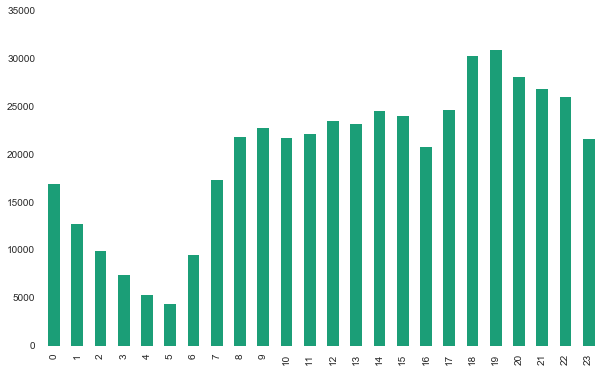

In [83]:
sample_trips_with_location['pickup_hour'].groupby(sample_trips_with_location['pickup_hour'].values).size().plot(kind='bar')

In [206]:
sample_trips_with_location.to_csv('../nyc_taxi_files/2013_January_with_location_sample_filtered.csv',index=False)

In [5]:
%%time

sample_trips_with_location = pd.read_csv('../nyc_taxi_files/2013_January_with_location_sample_filtered.csv')

Wall time: 3.47 s


In [6]:
sample_trips_with_location.head()

medallion                      hack_license  \
0  1AD5ADEA9A285A21AB8D1D7D1D17EA22  853E8DE75A70EF3AD0E687B2BD6BEF6E   
1  3461F0C844CCE0E649855083A5200F10  AADFBC30D5318F464E57396A354B4586   
2  562B69C7E8D0EFAB5EE4C16F0145579A  F170306D19A0D769162C70652EB74F03   
3  3E78E14594AC31EDB9D879880962CC90  30CEAE166FDC2B4B1BD6A217C8DD3ADB   
4  4B729520F0F35F1DA5DE95C689C6073C  12EEEB687CC6BA15A711BF1DF73A03E6   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-24 23:01:31   
1       CMT          1                  N  2013-01-06 00:12:00   
2       CMT          1                  N  2013-01-10 20:28:15   
3       VTS          1                NaN  2013-01-18 13:29:00   
4       CMT          1                  N  2013-01-02 08:09:10   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-24 23:11:31                1                600           2.80   
1  2013-01-06 00:16:15                1                254           0.70   
2  2013-01-10 20:35:07                1                412           1.10   
3  2013-01-18 13:35:00                1                360           1.47   
4  2013-01-02 08:13:47                1                277           0.90   

      ...      surcharge  mta_tax  tip_amount  tolls_amount total_amount  \
0     ...            0.5      0.5         3.6           0.0         15.6   
1     ...            0.5      0.5         1.0           0.0          7.0   
2     ...            0.5      0.5         1.5           0.0          9.0   
3     ...            0.0      0.5         1.3           0.0          8.3   
4     ...            0.0      0.5         0.0           0.0          6.0   

   pickup_hour  dropoff_hour  pickup_wday  pickup_day   full_date  
0           23            23            3    Thursday  2013-01-24  
1            0             0            6      Sunday  2013-01-06  
2           20            20            3    Thursday  2013-01-10  
3           13            13            4      Friday  2013-01-18  
4            8             8            2   Wednesday  2013-01-02  

[5 rows x 26 columns]

In [7]:
sample_trips_with_location.shape

(475698, 26)

### Inserting neighborhood details within a sample of the data

We go back to working with the sample dataset extracted from the overall dataset. We now combine this sample dataset with the neighborhoods data so that each trip is assigned a neighborhood.

In [8]:
trip_df_essential = sample_trips_with_location[['medallion','hack_license','vendor_id','pickup_datetime','pickup_latitude','pickup_longitude']]

In [9]:
trip_df_essential.head()

medallion                      hack_license  \
0  1AD5ADEA9A285A21AB8D1D7D1D17EA22  853E8DE75A70EF3AD0E687B2BD6BEF6E   
1  3461F0C844CCE0E649855083A5200F10  AADFBC30D5318F464E57396A354B4586   
2  562B69C7E8D0EFAB5EE4C16F0145579A  F170306D19A0D769162C70652EB74F03   
3  3E78E14594AC31EDB9D879880962CC90  30CEAE166FDC2B4B1BD6A217C8DD3ADB   
4  4B729520F0F35F1DA5DE95C689C6073C  12EEEB687CC6BA15A711BF1DF73A03E6   

  vendor_id      pickup_datetime  pickup_latitude  pickup_longitude  
0       CMT  2013-01-24 23:01:31        40.784348        -73.956207  
1       CMT  2013-01-06 00:12:00        40.762623        -73.962692  
2       CMT  2013-01-10 20:28:15        40.761772        -73.983894  
3       VTS  2013-01-18 13:29:00        40.780113        -73.980446  
4       CMT  2013-01-02 08:09:10        40.756317        -73.990608

In [10]:
%%time

trip_df_essential.to_csv('../nyc_taxi_files/2013_Jan_essential_filtered.csv',index=False)

Wall time: 2.78 s


In [13]:
trip_df_essential.describe()

pickup_latitude  pickup_longitude
count    475698.000000     475698.000000
mean         40.752629        -73.978872
std           0.020336          0.023660
min          40.700001        -74.049995
25%          40.738457        -73.992371
50%          40.754204        -73.982368
75%          40.767151        -73.970062
max          40.799999        -73.800179

In [14]:
trip_df_essential.head()

medallion                      hack_license  \
0  1AD5ADEA9A285A21AB8D1D7D1D17EA22  853E8DE75A70EF3AD0E687B2BD6BEF6E   
1  3461F0C844CCE0E649855083A5200F10  AADFBC30D5318F464E57396A354B4586   
2  562B69C7E8D0EFAB5EE4C16F0145579A  F170306D19A0D769162C70652EB74F03   
3  3E78E14594AC31EDB9D879880962CC90  30CEAE166FDC2B4B1BD6A217C8DD3ADB   
4  4B729520F0F35F1DA5DE95C689C6073C  12EEEB687CC6BA15A711BF1DF73A03E6   

  vendor_id      pickup_datetime  pickup_latitude  pickup_longitude  
0       CMT  2013-01-24 23:01:31        40.784348        -73.956207  
1       CMT  2013-01-06 00:12:00        40.762623        -73.962692  
2       CMT  2013-01-10 20:28:15        40.761772        -73.983894  
3       VTS  2013-01-18 13:29:00        40.780113        -73.980446  
4       CMT  2013-01-02 08:09:10        40.756317        -73.990608

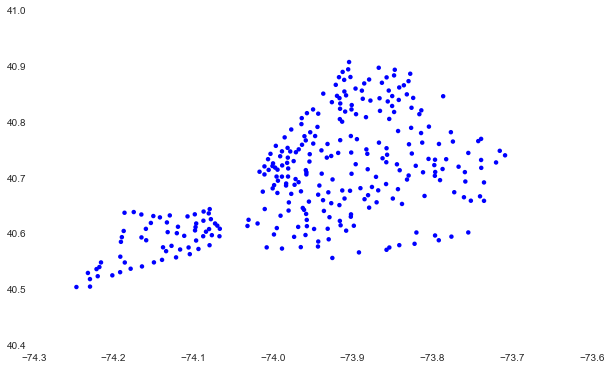

In [15]:
plt.scatter(x = neighborhood_df['longitude'], y = neighborhood_df['latitude'])

In [16]:
centroids = []
cls = cluster.k_means(neighborhood_df[['longitude', 'latitude']].values, 5)
centroids.append(cls[0])
neighborhood_df['clusters'] = cls[1]

print cls

(array([[-73.87915333,  40.84291032],
       [-74.13890585,  40.58839034],
       [-73.79772289,  40.70843049],
       [-73.96713601,  40.72986982],
       [-73.93652291,  40.62402866]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 2, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [17]:
neighborhood_df.tail()

the_geom  OBJECTID             Name  \
294  POINT (-74.13792663771576 40.576506293794935)       295  Lighthouse Hill   
295  POINT (-74.22957080626948 40.519541457489126)       296  Richmond Valley   
296   POINT (-73.8266775713865 40.790601556701525)       297            Malba   
297    POINT (-73.8902809854761 40.68248551101694)       298    Highland Park   
298    POINT (-73.948415153289 40.609377701137696)       299          Madison   

     Stacked   AnnoLine1 AnnoLine2 AnnoLine3  AnnoAngle        Borough  \
294        2  Lighthouse      Hill       NaN          0  Staten Island   
295        2    Richmond    Valley       NaN          0  Staten Island   
296        1       Malba       NaN       NaN          0         Queens   
297        2    Highland      Park       NaN          0       Brooklyn   
298        1     Madison       NaN       NaN          0       Brooklyn   

     longitude   latitude  clusters  
294 -74.137927  40.576506         1  
295 -74.229571  40.519541         1  
296 -73.826678  40.790602         0  
297 -73.890281  40.682486         4  
298 -73.948415  40.609378         4

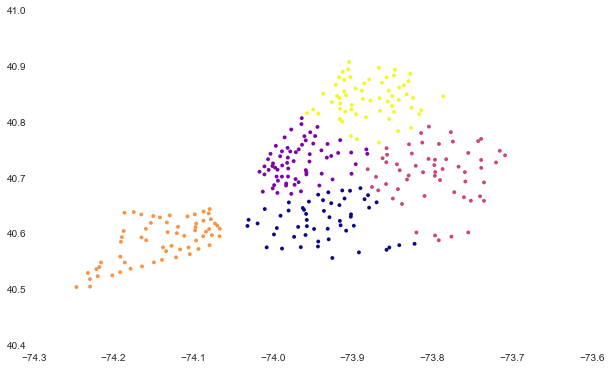

In [18]:
plt.scatter(x = neighborhood_df['longitude'], y = neighborhood_df['latitude'], c=neighborhood_df['clusters'], s=15, cmap='plasma_r')

In [19]:
neighborhood_df_sorted = neighborhood_df.sort('Name')

C:\Users\Anirban\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [20]:
neighborhood_df_sorted.reset_index(inplace = True)
del neighborhood_df_sorted['index']

In [21]:
neighborhood_grouped = neighborhood_df_sorted.groupby('Name').count()[['Borough']]
neighborhood_grouped[neighborhood_grouped.Borough == 2]

Borough
Name                
Bay Terrace        2
Chelsea            2
Murray Hill        2
Sunnyside          2

In [22]:
neighborhood_df[neighborhood_df.Name.isin(['Bay Terrace','Chelsea','Murray Hill','Sunnyside'])]

the_geom  OBJECTID         Name  \
117   POINT (-73.97833207924134 40.74830307725222)       118  Murray Hill   
118    POINT (-74.0031163347282 40.74403470674802)       119      Chelsea   
142   POINT (-73.92691617561584 40.74017628351928)       143    Sunnyside   
177    POINT (-73.77680222621588 40.7828428062456)       178  Bay Terrace   
182    POINT (-73.81276269135873 40.7641261226141)       183  Murray Hill   
222  POINT (-74.09712552178537 40.612760157564935)       223    Sunnyside   
237   POINT (-74.13916622175775 40.55398800858466)       238  Bay Terrace   
246   POINT (-74.18956045519697 40.59472602746298)       247      Chelsea   

     Stacked  AnnoLine1 AnnoLine2 AnnoLine3  AnnoAngle        Borough  \
117        2     Murray      Hill       NaN          0      Manhattan   
118        1    Chelsea       NaN       NaN          0      Manhattan   
142        1  Sunnyside       NaN       NaN          0         Queens   
177        2        Bay   Terrace       NaN          0         Queens   
182        2     Murray      Hill       NaN          0         Queens   
222        1  Sunnyside       NaN       NaN          0  Staten Island   
237        2        Bay   Terrace       NaN          0  Staten Island   
246        1    Chelsea       NaN       NaN          0  Staten Island   

     longitude   latitude  clusters  
117 -73.978332  40.748303         3  
118 -74.003116  40.744035         3  
142 -73.926916  40.740176         3  
177 -73.776802  40.782843         2  
182 -73.812763  40.764126         2  
222 -74.097126  40.612760         1  
237 -74.139166  40.553988         1  
246 -74.189560  40.594726         1

In [37]:
centroids_df = pd.DataFrame(data=centroids[0], columns=('centroid_lon','centroid_lat'))

In [38]:
centroids_df

centroid_lon  centroid_lat
0    -73.967136     40.729870
1    -73.936523     40.624029
2    -74.138906     40.588390
3    -73.879153     40.842910
4    -73.797723     40.708430

In [39]:
centroids_df['cluster'] = centroids_df.index.astype(int)
centroids_df

centroid_lon  centroid_lat  cluster
0    -73.967136     40.729870        0
1    -73.936523     40.624029        1
2    -74.138906     40.588390        2
3    -73.879153     40.842910        3
4    -73.797723     40.708430        4

In [134]:
def search_cluster(lat,lon,cluster_ind):
    cluster_df = neighborhood_df[neighborhood_df['clusters'] == cluster_ind]

    dist_array = {}
    
    
    for index2, neighborhood in cluster_df.iterrows():
        miles = np.sqrt((lat - neighborhood['latitude'])**2 + (lon - neighborhood['longitude'])**2)
        
        dist_array[miles] = neighborhood['Name']   
    
#     print dist_array[min(dist_array)]
    return dist_array[min(dist_array)]

In [173]:
%%time

# count1 = 1

neighborhood_array=[]
for index1, taxi_row in sample_trips_with_location.iterrows():
#     if count1 > 1000:
#         break
    
    dist_min = 100
    cluster_ind = 6
    
    for index2, centroid in centroids_df.iterrows():
        dist = np.sqrt((taxi_row['pickup_latitude'] - centroid['centroid_lat'])**2 + (taxi_row['pickup_longitude'] - centroid['centroid_lon'])**2)

        if dist < dist_min:
            dist_min = dist
            cluster_ind = centroid['cluster'].astype(int)
        
    nearest_nbrhd = search_cluster(taxi_row['pickup_latitude'],taxi_row['pickup_longitude'],cluster_ind)
    neighborhood_array.append(nearest_nbrhd)
#     count1+=1

Wall time: 1h 27min 13s


In [175]:
print neighborhood_array[0:5]
len(neighborhood_array)

['Carnegie Hill', 'Sutton Place', 'Midtown', 'Lincoln Square', 'Clinton']


475698

In [211]:
sample_trips_with_location['neighborhood'] = neighborhood_array

C:\Users\Anirban\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [176]:
sample_trips_with_location.shape

(475698, 27)

In [227]:
%%time

sample_trips_with_location.to_csv('../nyc_taxi_files/2013_Jan_sample_nbrhd.csv',index=False)

Wall time: 1min 38s


In [23]:
%%time

sample_trips_with_location = pd.read_csv('../nyc_taxi_files/2013_Jan_sample_nbrhd.csv')

Wall time: 9.36 s


In [24]:
sample_trips_with_location.tail()

medallion                      hack_license  \
475693  47BC597106ED8E7FD467C30ECDFDC80C  E9F549B2A082D94B5CDE98F6D1AA321D   
475694  B1F31138576E92C56259AAB60FE7F9C5  6CFAE045F07EAC01CB4EC8A7224E36C1   
475695  3DF0F9565A7E26AA877CDB83DD64F686  6206C6CD61D6E3654FB2B3BF688887D8   
475696  C22DD510498405D3A8C390EDEA3A13DF  56940FBD8DE0F148FA8834FD1F29D552   
475697  6891C37EEFFB4A2086AD32CD08DD70E9  E30CE40210664D5BC68B9B9977DAF40E   

       vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
475693       VTS          1                NaN  2013-01-06 14:05:00   
475694       VTS          1                NaN  2013-01-02 03:01:00   
475695       VTS          1                NaN  2013-01-30 10:18:00   
475696       VTS          1                NaN  2013-01-26 13:48:00   
475697       CMT          1                  N  2013-01-21 11:15:59   

           dropoff_datetime  passenger_count  trip_time_in_secs  \
475693  2013-01-06 14:15:00                1                600   
475694  2013-01-02 03:08:00                3                420   
475695  2013-01-30 10:26:00                1                480   
475696  2013-01-26 14:01:00                5                780   
475697  2013-01-21 11:32:57                1               1017   

        trip_distance      ...        mta_tax  tip_amount  tolls_amount  \
475693           1.18      ...            0.5        0.00           0.0   
475694           2.21      ...            0.5        1.80           0.0   
475695           1.13      ...            0.5        1.40           0.0   
475696           2.25      ...            0.5        2.62           0.0   
475697           4.10      ...            0.5        0.00           0.0   

        total_amount pickup_hour  dropoff_hour  pickup_wday  pickup_day  \
475693          9.00          14            14            6      Sunday   
475694         11.30           3             3            2   Wednesday   
475695          8.90          10            10            2   Wednesday   
475696         13.62          13            14            5    Saturday   
475697         16.00          11            11            0      Monday   

         full_date   neighborhood  
475693  2013-01-06  Carnegie Hill  
475694  2013-01-02    East Harlem  
475695  2013-01-30   West Village  
475696  2013-01-26   West Village  
475697  2013-01-21  Carnegie Hill  

[5 rows x 27 columns]

In [138]:
sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood'])['full_date'].count().values

array([ 3,  6, 39, ..., 19, 33,  5], dtype=int64)

In [140]:
sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood']).count()

medallion  hack_license  vendor_id  \
full_date  pickup_hour neighborhood                                             
2013-01-01 0           Astoria                     3             3          3   
                       Battery Park City           6             6          6   
                       Carnegie Hill              39            39         39   
                       Chelsea                    45            45         45   
                       Chinatown                   8             8          8   
                       Civic Center               13            13         13   
                       Clinton                    44            44         44   
                       Dumbo                       2             2          2   
                       East Elmhurst               2             2          2   
                       East Harlem                10            10         10   
                       East Village               30            30         30   
                       East Williamsburg          11            11         11   
                       Elmhurst                    1             1          1   
                       Financial District         16            16         16   
                       Flatiron                   51            51         51   
                       Fulton Ferry                1             1          1   
                       Gramercy                   32            32         32   
                       Greenpoint                  9             9          9   
                       Greenwich Village          23            23         23   
                       Hunters Point               1             1          1   
                       Lenox Hill                 35            35         35   
                       Lincoln Square             53            53         53   
                       Little Italy               14            14         14   
                       Long Island City            1             1          1   
                       Lower East Side             6             6          6   
                       Manhattan Valley           14            14         14   
                       Midtown                    47            47         47   
                       Midtown South              52            52         52   
                       Murray Hill                34            34         34   
                       Noho                       32            32         32   
...                                              ...           ...        ...   
2013-01-31 23          Financial District         10            10         10   
                       Flatiron                   73            73         73   
                       Gramercy                   38            38         38   
                       Greenpoint                  4             4          4   
                       Greenwich Village          49            49         49   
                       Hunters Point               2             2          2   
                       Lenox Hill                 21            21         21   
                       Lincoln Square             65            65         65   
                       Little Italy               20            20         20   
                       Long Island City            4             4          4   
                       Lower East Side             3             3          3   
                       Manhattan Valley           11            11         11   
                       Midtown                   133           133        133   
                       Midtown South              64            64         64   
                       Murray Hill                28            28         28   
                       Noho                       57            57         57   
                       North Side                 12            12        

In [139]:
trip_count_df = pd.DataFrame(columns = ['full_date','pickup_hour','pickup_day','neighborhood','no_of_trips'])

In [141]:
%%time

trip_count_df['full_date'] = sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood'])['full_date'].first().values
trip_count_df['pickup_hour'] = sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood'])['pickup_hour'].first().values
trip_count_df['neighborhood'] = sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood'])['neighborhood'].first().values
trip_count_df['pickup_day'] = sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood'])['pickup_day'].first().values
trip_count_df['no_of_trips'] = sample_trips_with_location.groupby(['full_date','pickup_hour','neighborhood'])['neighborhood'].count().values

Wall time: 873 ms


In [142]:
%%time

trip_count_df.to_csv('../nyc_taxi_files/2013_Jan_trip_count.csv', index=False)

Wall time: 80 ms


In [25]:
%%time

trip_count_df = pd.read_csv('../nyc_taxi_files/2013_Jan_trip_count.csv')

Wall time: 129 ms


In [26]:
trip_count_df.shape

(29421, 5)

In [27]:
trip_count_df.head()

full_date  pickup_hour       neighborhood  no_of_trips pickup_day
0  2013-01-01            0            Astoria            3    Tuesday
1  2013-01-01            0  Battery Park City            6    Tuesday
2  2013-01-01            0      Carnegie Hill           39    Tuesday
3  2013-01-01            0            Chelsea           45    Tuesday
4  2013-01-01            0          Chinatown            8    Tuesday

In [145]:
print trip_count_df['neighborhood'].unique().size
print neighborhood_df['Name'].unique().size

81
295


In [28]:
trip_count_df_filtered = trip_count_df[~(trip_count_df.neighborhood.isin(['Bay Terrace','Chelsea','Murray Hill','Sunnyside']))]

In [29]:
print trip_count_df_filtered.shape
trip_count_with_neighborhood = trip_count_df_filtered.set_index('neighborhood').join(neighborhood_df.set_index('Name'))
print trip_count_with_neighborhood.shape

(27645, 5)
(27645, 15)


In [30]:
trip_count_with_neighborhood = trip_count_with_neighborhood[['full_date','pickup_hour','pickup_day','no_of_trips','Borough','longitude','latitude','clusters']]
trip_count_with_neighborhood['neighborhood'] = trip_count_with_neighborhood.index.values
trip_count_with_neighborhood.reset_index(drop=True,inplace=True)
trip_count_with_neighborhood.head()

full_date  pickup_hour pickup_day  no_of_trips Borough  longitude  \
0  2013-01-01            0    Tuesday            3  Queens -73.915654   
1  2013-01-01            1    Tuesday           13  Queens -73.915654   
2  2013-01-01            2    Tuesday            6  Queens -73.915654   
3  2013-01-01            3    Tuesday            9  Queens -73.915654   
4  2013-01-01            4    Tuesday           11  Queens -73.915654   

    latitude  clusters neighborhood  
0  40.768509         3      Astoria  
1  40.768509         3      Astoria  
2  40.768509         3      Astoria  
3  40.768509         3      Astoria  
4  40.768509         3      Astoria

In [31]:
print trip_count_with_neighborhood.clusters.unique()
print trip_count_with_neighborhood.Borough.unique()
print trip_count_with_neighborhood.neighborhood.unique().size

[3 0 2]
['Queens' 'Manhattan' 'Brooklyn' 'Bronx']
78


In [32]:
lm = smf.ols(formula='no_of_trips ~ neighborhood', data=trip_count_with_neighborhood).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_of_trips   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     483.4
Date:                Fri, 10 Jun 2016   Prob (F-statistic):               0.00
Time:                        13:59:42   Log-Likelihood:            -1.0972e+05
No. Observations:               27645   AIC:                         2.196e+05
Df Residuals:                   27567   BIC:                         2.202e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Intercept                                2.0791      0.557      3.736      0.000         0.988     3.170
neighborhood[T.Astoria Heights]         -0.1606      0.908     -0.177      0.860        -1.941     1.620
neighborhood[T.Battery Park City]        4.8478      0.748      6.478      0.000         3.381     6.315
neighborhood[T.Blissville]              -0.9724      1.582     -0.615      0.539        -4.073     2.128
neighborhood[T.Briarwood]               -1.0791      2.079     -0.519      0.604        -5.153     2.995
neighborhood[T.Bushwick]                -0.8465      2.033     -0.416      0.677        -4.832     3.139
neighborhood[T.Carnegie Hill]           20.7174      0.731     28.341      0.000        19.285    22.150
neighborhood[T.Central Harlem]          -0.9511      1.275     -0.746      0.456        -3.450     1.548
neighborhood[T.Chinatown]                1.3066      0.755      1.730      0.084        -0.174     2.787
neighborhood[T.Civic Center]             6.4379      0.736      8.745      0.000         4.995     7.881
neighborhood[T.Clinton]                 28.2784      0.729     38.817      0.000        26.851    29.706
neighborhood[T.College Point]           -1.0791      7.425     -0.145      0.884       -15.632    13.474
neighborhood[T.Downtown Flushing]       -1.0505      2.238     -0.469      0.639        -5.437     3.336
neighborhood[T.Dumbo]                   -0.5774      0.931     -0.620      0.535        -2.403     1.248
neighborhood[T.East Elmhurst]           12.7437      0.760     16.775      0.000        11.255    14.233
neighborhood[T.East Harlem]              1.6253      0.743      2.189      0.029         0.170     3.081
neighborhood[T.East Village]            12.8710      0.729     17.653      0.000        11.442    14.300
neighborhood[T.East Williamsburg]        0.0819      1.003      0.082      0.935        -1.884     2.048
neighborhood[T.Elmhurst]                -0.9512      1.491     -0.638      0.523        -3.873     1.970
neighborhood[T.Financial District]       7.9294      0.737     10.758      0.000         6.485     9.374
neighborhood[T.Flatiron]                37.2865      0.729     51.182      0.000        35.859    38.714
neighborhood[T.Forest Hills]            -0.9875      1.212     -0.815      0.415        -3.362     1.387
neighborhood[T.Forest Hills Gardens]    -0.9823      2.369     -0.415      0.678        -5.627     3.662
neighborhood[T.Fulton Ferry]            -0.9416      1.538     -0.612      0.540        -3.956     2.073
neighborhood[T.Glendale]                -1.0791      9.085     -0.119      0.905       -18.886    16.728
neighborhood[T.Gramercy]                17.2227      0.730     23.608      0.000        15.793    18.653
neighborhood[T.Greenpoint]            

In [33]:
hour = pd.get_dummies(trip_count_with_neighborhood.pickup_hour, prefix = 'hour')
trip_count_with_neighborhood = trip_count_with_neighborhood.join(hour[['hour_0','hour_1','hour_2','hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8','hour_9',
                                                'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17',
                                                'hour_18','hour_19','hour_20','hour_21','hour_22','hour_23']])

In [34]:
clusters_dummies = pd.get_dummies(trip_count_with_neighborhood.clusters, prefix = 'cluster')
frames = [trip_count_with_neighborhood, clusters_dummies]
trip_count_with_neighborhood = pd.concat(frames, axis = 1)

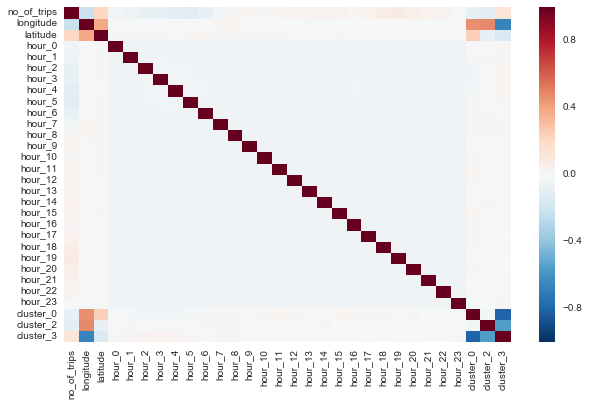

In [35]:
sns.heatmap(trip_count_with_neighborhood.drop(['full_date','pickup_hour','clusters'], axis=1).corr())

In [36]:
neighborhood_dummies = pd.get_dummies(trip_count_with_neighborhood.neighborhood, prefix = 'Nbr')

In [38]:
lm = smf.ols(formula='no_of_trips ~ neighborhood + hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + \
             hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + \
             hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=trip_count_with_neighborhood).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_of_trips   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     540.0
Date:                Fri, 10 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:00:13   Log-Likelihood:            -1.0653e+05
No. Observations:               27645   AIC:                         2.133e+05
Df Residuals:                   27544   BIC:                         2.141e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Intercept                            -2.274e+12   3.09e+12     -0.735      0.462     -8.33e+12  3.79e+12
neighborhood[T.Astoria Heights]         -3.4853      0.812     -4.290      0.000        -5.078    -1.893
neighborhood[T.Battery Park City]        3.7183      0.731      5.087      0.000         2.286     5.151
neighborhood[T.Blissville]              -2.7812      1.428     -1.948      0.051        -5.580     0.018
neighborhood[T.Briarwood]               -2.4570      1.867     -1.316      0.188        -6.117     1.203
neighborhood[T.Bushwick]                 2.2616      1.817      1.245      0.213        -1.300     5.823
neighborhood[T.Carnegie Hill]           20.5023      0.709     28.914      0.000        19.112    21.892
neighborhood[T.Central Harlem]          -2.4907      1.144     -2.178      0.029        -4.732    -0.249
neighborhood[T.Chinatown]                0.2830      0.683      0.414      0.679        -1.057     1.623
neighborhood[T.Civic Center]             5.8546      0.687      8.526      0.000         4.509     7.201
neighborhood[T.Clinton]                 28.1478      0.675     41.695      0.000        26.825    29.471
neighborhood[T.College Point]           -4.7182      6.622     -0.713      0.476       -17.697     8.260
neighborhood[T.Downtown Flushing]       -0.5969      1.998     -0.299      0.765        -4.513     3.319
neighborhood[T.Dumbo]                   -2.9815      0.833     -3.578      0.000        -4.615    -1.348
neighborhood[T.East Elmhurst]           10.5737      0.685     15.426      0.000         9.230    11.917
neighborhood[T.East Harlem]              0.8916      0.682      1.307      0.191        -0.445     2.229
neighborhood[T.East Village]            12.5915      0.651     19.331      0.000        11.315    13.868
neighborhood[T.East Williamsburg]        1.0524      0.897      1.173      0.241        -0.706     2.811
neighborhood[T.Elmhurst]                 0.8373      1.330      0.630      0.529        -1.770     3.445
neighborhood[T.Financial District]       7.1094      0.658     10.797      0.000         5.819     8.400
neighborhood[T.Flatiron]                37.0504      0.651     56.933      0.000        35.775    38.326
neighborhood[T.Forest Hills]            -0.3898      1.081     -0.361      0.718        -2.509     1.729
neighborhood[T.Forest Hills Gardens]    -1.8521      2.113     -0.876      0.381        -5.995     2.290
neighborhood[T.Fulton Ferry]            -3.6704      1.372     -2.674      0.007        -6.360    -0.980
neighborhood[T.Glendale]                -1.5221      8.101     -0.188      0.851       -17.401    14.357
neighborhood[T.Gramercy]                16.9182      0.652     25.959      0.000        15.641    18.196
neighborhood[T.Greenpoint]            

In [39]:
lm = smf.ols(formula='no_of_trips ~ neighborhood + pickup_day + hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + \
             hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + \
             hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=trip_count_with_neighborhood).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_of_trips   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     516.1
Date:                Fri, 10 Jun 2016   Prob (F-statistic):               0.00
Time:                        14:00:28   Log-Likelihood:            -1.0641e+05
No. Observations:               27645   AIC:                         2.130e+05
Df Residuals:                   27538   BIC:                         2.139e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Intercept                            -2.619e+12   3.09e+12     -0.846      0.397     -8.68e+12  3.45e+12
neighborhood[T.Astoria Heights]         -3.4216      0.809     -4.230      0.000        -5.007    -1.836
neighborhood[T.Battery Park City]        3.7904      0.729      5.202      0.000         2.362     5.219
neighborhood[T.Blissville]              -2.7320      1.424     -1.918      0.055        -5.523     0.059
neighborhood[T.Briarwood]               -2.4409      1.858     -1.314      0.189        -6.082     1.200
neighborhood[T.Bushwick]                 2.2626      1.809      1.251      0.211        -1.283     5.809
neighborhood[T.Carnegie Hill]           20.5889      0.707     29.129      0.000        19.203    21.974
neighborhood[T.Central Harlem]          -2.5890      1.139     -2.273      0.023        -4.822    -0.357
neighborhood[T.Chinatown]                0.3474      0.681      0.511      0.610        -0.986     1.681
neighborhood[T.Civic Center]             5.9360      0.684      8.681      0.000         4.596     7.276
neighborhood[T.Clinton]                 28.2328      0.673     41.951      0.000        26.914    29.552
neighborhood[T.College Point]           -3.7393      6.594     -0.567      0.571       -16.665     9.186
neighborhood[T.Downtown Flushing]       -0.8335      1.990     -0.419      0.675        -4.733     3.066
neighborhood[T.Dumbo]                   -2.9708      0.830     -3.580      0.000        -4.597    -1.344
neighborhood[T.East Elmhurst]           10.6374      0.683     15.574      0.000         9.299    11.976
neighborhood[T.East Harlem]              0.9472      0.679      1.395      0.163        -0.384     2.278
neighborhood[T.East Village]            12.6569      0.649     19.515      0.000        11.386    13.928
neighborhood[T.East Williamsburg]        1.0520      0.893      1.178      0.239        -0.699     2.803
neighborhood[T.Elmhurst]                 0.8693      1.325      0.656      0.512        -1.727     3.466
neighborhood[T.Financial District]       7.1632      0.656     10.925      0.000         5.878     8.448
neighborhood[T.Flatiron]                37.1174      0.648     57.277      0.000        35.847    38.388
neighborhood[T.Forest Hills]            -0.1501      1.077     -0.139      0.889        -2.261     1.961
neighborhood[T.Forest Hills Gardens]    -1.7773      2.105     -0.844      0.398        -5.903     2.348
neighborhood[T.Fulton Ferry]            -3.7365      1.367     -2.734      0.006        -6.415    -1.058
neighborhood[T.Glendale]                -2.1921      8.068     -0.272      0.786       -18.006    13.622
neighborhood[T.Gramercy]                16.9795      0.649     26.163      0.000        15.707    18.252
neighborhood[T.Greenpoint]            

In [56]:
frames = [trip_count_with_neighborhood, neighborhood_dummies]
trip_count_all_dummies = pd.concat(frames, axis=1)
print trip_count_all_dummies.shape
trip_count_all_dummies.head()

(27645, 114)


full_date  pickup_hour pickup_day  no_of_trips Borough  longitude  \
0  2013-01-01            0    Tuesday            3  Queens -73.915654   
1  2013-01-01            1    Tuesday           13  Queens -73.915654   
2  2013-01-01            2    Tuesday            6  Queens -73.915654   
3  2013-01-01            3    Tuesday            9  Queens -73.915654   
4  2013-01-01            4    Tuesday           11  Queens -73.915654   

    latitude  clusters neighborhood  hour_0      ...        Nbr_Turtle Bay  \
0  40.768509         3      Astoria     1.0      ...                   0.0   
1  40.768509         3      Astoria     0.0      ...                   0.0   
2  40.768509         3      Astoria     0.0      ...                   0.0   
3  40.768509         3      Astoria     0.0      ...                   0.0   
4  40.768509         3      Astoria     0.0      ...                   0.0   

   Nbr_Upper East Side  Nbr_Upper West Side  Nbr_Vinegar Hill  \
0                  0.0                  0.0               0.0   
1                  0.0                  0.0               0.0   
2                  0.0                  0.0               0.0   
3                  0.0                  0.0               0.0   
4                  0.0                  0.0               0.0   

   Nbr_West Village  Nbr_Whitestone  Nbr_Williamsburg  Nbr_Woodhaven  \
0               0.0             0.0               0.0            0.0   
1               0.0             0.0               0.0            0.0   
2               0.0             0.0               0.0            0.0   
3               0.0             0.0               0.0            0.0   
4               0.0             0.0               0.0            0.0   

   Nbr_Woodside  Nbr_Yorkville  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0  

[5 rows x 114 columns]

In [41]:
def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
#     print 'Coefficients:', algo.coef_
#     print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))

    # keep the model
    return algo

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R-Squared: 0.0673004579686

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-Squared: 0.662208913062

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
R-Squared: 0.0162179803304



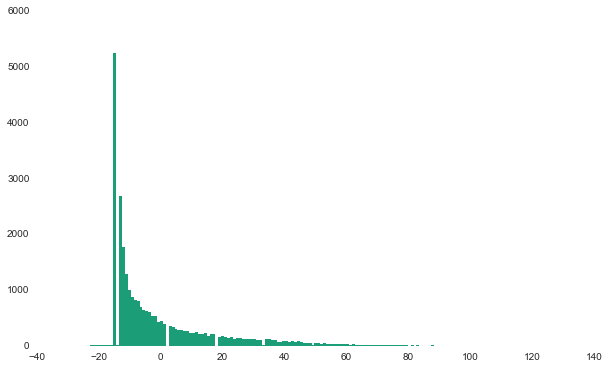

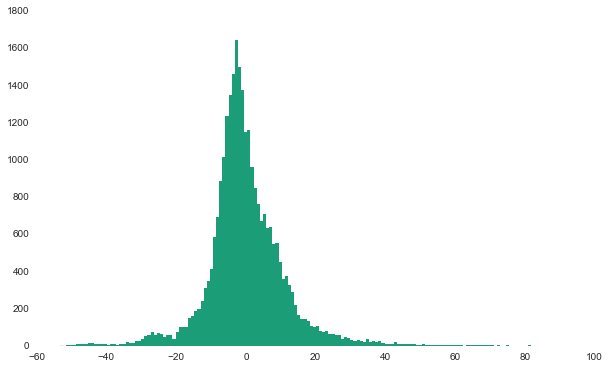

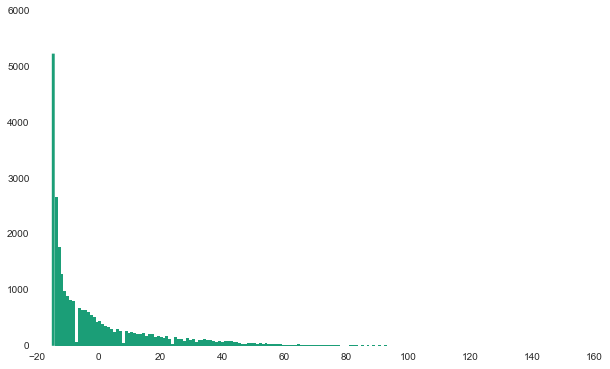

In [57]:
X = trip_count_all_dummies.drop(['full_date','pickup_day','pickup_hour','no_of_trips','Borough','longitude','latitude','clusters','neighborhood'], axis=1)
y = trip_count_all_dummies['no_of_trips']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print

In [120]:
weather_df = pd.read_csv('https://www.wunderground.com/history/airport/KNYC/2013/1/1/MonthlyHistory.html?&reqdb.zip=&reqdb.magic=&reqdb.wmo=&MR=1&format=1')
weather_df.head()

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0  2013-1-1                40                 33                26   
1  2013-1-2                33                 28                22   
2  2013-1-3                32                 28                24   
3  2013-1-4                37                 34                30   
4  2013-1-5                42                 37                32   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0              27              22              9            64   
1              15              11              9            57   
2              17              14             12            68   
3              21              19             18            63   
4              21              19             16            56   

    Mean Humidity   Min Humidity          ...            Max VisibilityMiles  \
0              54             44          ...                             10   
1              48             39          ...                             10   
2              56             43          ...                             10   
3              56             48          ...                             10   
4              48             39          ...                             10   

    Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
0                     10                    10                  15   
1                     10                    10                  15   
2                     10                    10                  13   
3                     10                    10                  18   
4                     10                    10                  17   

    Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
0                    7                  26             0.00            5   
1                    6                  22             0.00            0   
2                    5                  20             0.00            2   
3                    8                  28             0.00            3   
4                    7                  26             0.00            1   

    Events  WindDirDegrees<br />  
0      NaN             283<br />  
1      NaN             299<br />  
2      NaN             272<br />  
3      NaN             268<br />  
4      NaN             285<br />  

[5 rows x 23 columns]

In [122]:
weather_df.columns

Index([u'EST', u'Max TemperatureF', u'Mean TemperatureF', u'Min TemperatureF',
       u'Max Dew PointF', u'MeanDew PointF', u'Min DewpointF', u'Max Humidity',
       u' Mean Humidity', u' Min Humidity', u' Max Sea Level PressureIn',
       u' Mean Sea Level PressureIn', u' Min Sea Level PressureIn',
       u' Max VisibilityMiles', u' Mean VisibilityMiles',
       u' Min VisibilityMiles', u' Max Wind SpeedMPH', u' Mean Wind SpeedMPH',
       u' Max Gust SpeedMPH', u'PrecipitationIn', u' CloudCover', u' Events',
       u' WindDirDegrees<br />', u'date'],
      dtype='object')

In [123]:
weather_df.rename(columns={'Max TemperatureF': 'Max_TemperatureF', 'Mean TemperatureF': 'Mean_TemperatureF', 
                          'Min TemperatureF':'Min_TemperatureF', 'Max Dew PointF':'Max_Dew_PointF',
                          'MeanDew PointF':'MeanDew_PointF', 'Min DewpointF':'Min_DewpointF','Max Humidity':'Max_Humidity',
                           ' Mean Humidity':'Mean_Humidity',' Min Humidity':'Min_Humidity', 
                           ' Max Sea Level PressureIn':'Max_Sea_Level_PressureIn',' Mean Sea Level PressureIn':'Mean_Sea_Level_PressureIn',
                           ' Min Sea Level PressureIn':'Min_Sea_Level_PressureIn',' Max VisibilityMiles':'Max_VisibilityMiles', 
                           ' Mean VisibilityMiles':'Mean_VisibilityMiles',' Min VisibilityMiles':'Min_VisibilityMiles',
                           ' Max Wind SpeedMPH':'Max_Wind_SpeedMPH',' Mean Wind SpeedMPH':'Mean_Wind_SpeedMPH',
                           ' Max Gust SpeedMPH':'Max_Gust_SpeedMPH','PrecipitationIn':'PrecipitationIn', ' CloudCover':'CloudCover', ' Events':'Events',
                           ' WindDirDegrees<br />':'WindDirDegrees'}, inplace=True)

In [124]:
weather_df.columns

Index([u'EST', u'Max_TemperatureF', u'Mean_TemperatureF', u'Min_TemperatureF',
       u'Max_Dew_PointF', u'MeanDew_PointF', u'Min_DewpointF', u'Max_Humidity',
       u'Mean_Humidity', u'Min_Humidity', u'Max_Sea_Level_PressureIn',
       u'Mean_Sea_Level_PressureIn', u'Min_Sea_Level_PressureIn',
       u'Max_VisibilityMiles', u'Mean_VisibilityMiles', u'Min_VisibilityMiles',
       u'Max_Wind_SpeedMPH', u'Mean_Wind_SpeedMPH', u'Max_Gust_SpeedMPH',
       u'PrecipitationIn', u'CloudCover', u'Events', u'WindDirDegrees',
       u'date'],
      dtype='object')

In [125]:
weather_df['WindDirDegrees'] = weather_df['WindDirDegrees'].apply(lambda x: x.split('<')[0])

In [126]:
weather_df.head()

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0  2013-1-1                40                 33                26   
1  2013-1-2                33                 28                22   
2  2013-1-3                32                 28                24   
3  2013-1-4                37                 34                30   
4  2013-1-5                42                 37                32   

   Max_Dew_PointF  MeanDew_PointF  Min_DewpointF  Max_Humidity  Mean_Humidity  \
0              27              22              9            64             54   
1              15              11              9            57             48   
2              17              14             12            68             56   
3              21              19             18            63             56   
4              21              19             16            56             48   

   Min_Humidity ...   Mean_VisibilityMiles  Min_VisibilityMiles  \
0            44 ...                     10                   10   
1            39 ...                     10                   10   
2            43 ...                     10                   10   
3            48 ...                     10                   10   
4            39 ...                     10                   10   

   Max_Wind_SpeedMPH  Mean_Wind_SpeedMPH  Max_Gust_SpeedMPH  PrecipitationIn  \
0                 15                   7                 26             0.00   
1                 15                   6                 22             0.00   
2                 13                   5                 20             0.00   
3                 18                   8                 28             0.00   
4                 17                   7                 26             0.00   

   CloudCover  Events  WindDirDegrees date  
0           5     NaN             283    1  
1           0     NaN             299    2  
2           2     NaN             272    3  
3           3     NaN             268    4  
4           1     NaN             285    5  

[5 rows x 24 columns]

In [109]:
print weather_df[' Events'].unique()
print weather_df['WindDirDegrees'].unique()

[nan 'Rain' 'Fog' 'Fog-Rain' 'Snow' 'Rain-Snow']
['283' '299' '272' '268' '285' '257' '291' '251' '265' '304' '76' '43'
 '160' '316' '38' '356' '318' '323' '237' '270' '297' '292' '311' '284'
 '303' '289' '233' '119' '121']


In [127]:
weather_df.loc[(weather_df['PrecipitationIn'] == 'T'),'PrecipitationIn'] = 0
weather_df['PrecipitationIn'] = weather_df['PrecipitationIn'].astype(float)

In [121]:
trip_count_all_dummies['date'] = trip_count_all_dummies['full_date'].apply(lambda x: time.strptime(x, "%Y-%m-%d").tm_mday)
weather_df['date'] = weather_df['EST'].apply(lambda x: time.strptime(x, "%Y-%m-%d").tm_mday)

In [128]:
trip_count_all_dummies.head()

full_date  pickup_hour pickup_day  no_of_trips Borough  longitude  \
0  2013-01-01            0    Tuesday            3  Queens -73.915654   
1  2013-01-01            1    Tuesday           13  Queens -73.915654   
2  2013-01-01            2    Tuesday            6  Queens -73.915654   
3  2013-01-01            3    Tuesday            9  Queens -73.915654   
4  2013-01-01            4    Tuesday           11  Queens -73.915654   

    latitude  clusters neighborhood  hour_0  ...   Nbr_Upper East Side  \
0  40.768509         3      Astoria     1.0  ...                   0.0   
1  40.768509         3      Astoria     0.0  ...                   0.0   
2  40.768509         3      Astoria     0.0  ...                   0.0   
3  40.768509         3      Astoria     0.0  ...                   0.0   
4  40.768509         3      Astoria     0.0  ...                   0.0   

   Nbr_Upper West Side  Nbr_Vinegar Hill  Nbr_West Village  Nbr_Whitestone  \
0                  0.0               0.0               0.0             0.0   
1                  0.0               0.0               0.0             0.0   
2                  0.0               0.0               0.0             0.0   
3                  0.0               0.0               0.0             0.0   
4                  0.0               0.0               0.0             0.0   

   Nbr_Williamsburg  Nbr_Woodhaven  Nbr_Woodside  Nbr_Yorkville  date  
0               0.0            0.0           0.0            0.0     1  
1               0.0            0.0           0.0            0.0     1  
2               0.0            0.0           0.0            0.0     1  
3               0.0            0.0           0.0            0.0     1  
4               0.0            0.0           0.0            0.0     1  

[5 rows x 115 columns]

In [131]:
trip_and_weather_df = trip_count_all_dummies.set_index('date').join(weather_df.set_index('date'))
trip_and_weather_df['date'] = trip_and_weather_df.index.values
trip_and_weather_df.reset_index(drop=True, inplace=True)
trip_and_weather_df.head()

full_date  pickup_hour pickup_day  no_of_trips Borough  longitude  \
0  2013-01-01            0    Tuesday            3  Queens -73.915654   
1  2013-01-01            1    Tuesday           13  Queens -73.915654   
2  2013-01-01            2    Tuesday            6  Queens -73.915654   
3  2013-01-01            3    Tuesday            9  Queens -73.915654   
4  2013-01-01            4    Tuesday           11  Queens -73.915654   

    latitude  clusters neighborhood  hour_0  ...   Mean_VisibilityMiles  \
0  40.768509         3      Astoria     1.0  ...                     10   
1  40.768509         3      Astoria     0.0  ...                     10   
2  40.768509         3      Astoria     0.0  ...                     10   
3  40.768509         3      Astoria     0.0  ...                     10   
4  40.768509         3      Astoria     0.0  ...                     10   

   Min_VisibilityMiles  Max_Wind_SpeedMPH  Mean_Wind_SpeedMPH  \
0                   10                 15                   7   
1                   10                 15                   7   
2                   10                 15                   7   
3                   10                 15                   7   
4                   10                 15                   7   

   Max_Gust_SpeedMPH  PrecipitationIn  CloudCover  Events  WindDirDegrees  \
0                 26              0.0           5     NaN             283   
1                 26              0.0           5     NaN             283   
2                 26              0.0           5     NaN             283   
3                 26              0.0           5     NaN             283   
4                 26              0.0           5     NaN             283   

   date  
0     1  
1     1  
2     1  
3     1  
4     1  

[5 rows x 138 columns]

In [132]:
trip_and_weather_df.columns.values

array(['full_date', 'pickup_hour', 'pickup_day', 'no_of_trips', 'Borough',
       'longitude', 'latitude', 'clusters', 'neighborhood', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'cluster_0',
       'cluster_2', 'cluster_3', 'Nbr_Astoria', 'Nbr_Astoria Heights',
       'Nbr_Battery Park City', 'Nbr_Blissville', 'Nbr_Briarwood',
       'Nbr_Bushwick', 'Nbr_Carnegie Hill', 'Nbr_Central Harlem',
       'Nbr_Chinatown', 'Nbr_Civic Center', 'Nbr_Clinton',
       'Nbr_College Point', 'Nbr_Downtown Flushing', 'Nbr_Dumbo',
       'Nbr_East Elmhurst', 'Nbr_East Harlem', 'Nbr_East Village',
       'Nbr_East Williamsburg', 'Nbr_Elmhurst', 'Nbr_Financial District',
       'Nbr_Flatiron', 'Nbr_Forest Hills', 'Nbr_Forest Hills Gardens',
       'Nbr_Fulton Ferry', 'N

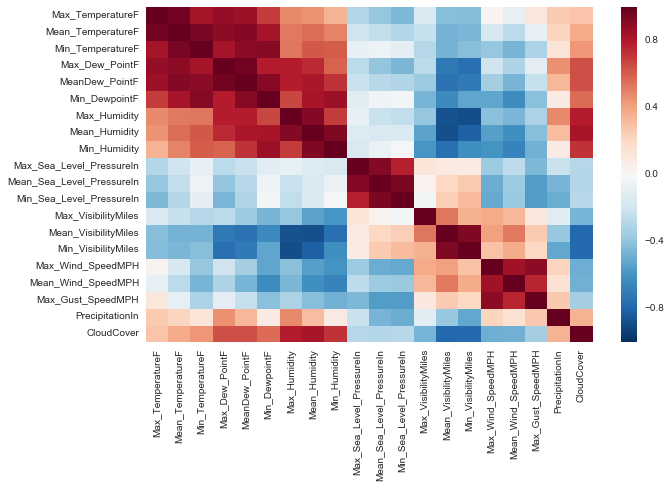

In [134]:
sns.heatmap(trip_and_weather_df[['Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',\
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',\
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',\
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',\
       'Max_VisibilityMiles', 'Mean_VisibilityMiles',\
       'Min_VisibilityMiles', 'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH',\
       'Max_Gust_SpeedMPH', 'PrecipitationIn', 'CloudCover',\
       'WindDirDegrees']].corr())

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R-Squared: 0.0689670460963

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R-Squared: 0.666666405448

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
R-Squared: 0.0180755592052



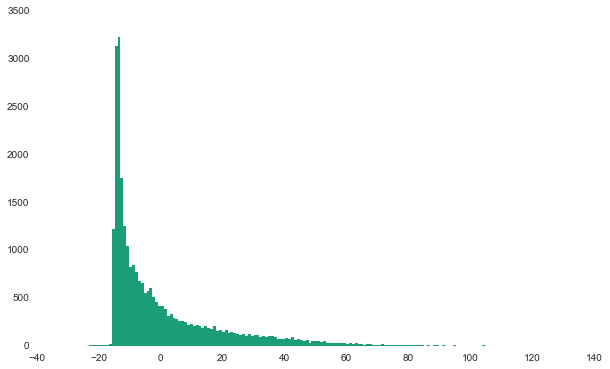

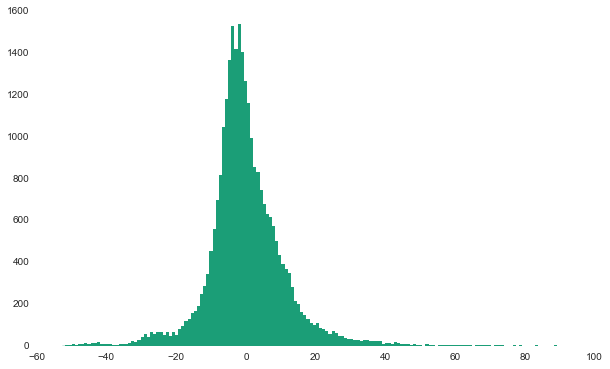

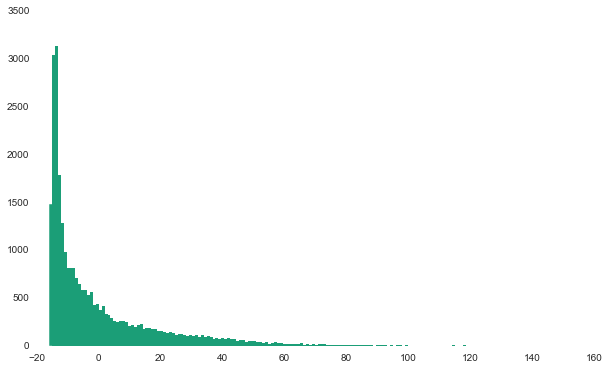

In [140]:
X = trip_and_weather_df.drop(['full_date','pickup_day','pickup_hour','no_of_trips','Borough','longitude','latitude','clusters',\
                              'neighborhood','date','EST','Events'], axis=1)
y = trip_and_weather_df['no_of_trips']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print

In [139]:
lm = smf.ols(formula='no_of_trips ~ neighborhood + pickup_day + hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + \
             hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + \
             hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23 + \
             Mean_TemperatureF + MeanDew_PointF + Mean_Humidity + Mean_Sea_Level_PressureIn + Mean_VisibilityMiles + \
             Mean_Wind_SpeedMPH + Max_Gust_SpeedMPH + PrecipitationIn + CloudCover', data=trip_and_weather_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_of_trips   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     479.0
Date:                Fri, 10 Jun 2016   Prob (F-statistic):               0.00
Time:                        15:46:31   Log-Likelihood:            -1.0634e+05
No. Observations:               27645   AIC:                         2.129e+05
Df Residuals:                   27529   BIC:                         2.139e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Intercept                             -140.2428     19.414     -7.224      0.000      -178.295  -102.190
neighborhood[T.Astoria Heights]         -3.5519      0.806     -4.405      0.000        -5.132    -1.971
neighborhood[T.Battery Park City]        3.4979      0.663      5.275      0.000         2.198     4.798
neighborhood[T.Blissville]              -2.8953      1.402     -2.065      0.039        -5.643    -0.148
neighborhood[T.Briarwood]               -2.6787      1.843     -1.454      0.146        -6.290     0.933
neighborhood[T.Bushwick]                 2.5054      1.803      1.389      0.165        -1.029     6.040
neighborhood[T.Carnegie Hill]           20.3330      0.648     31.400      0.000        19.064    21.602
neighborhood[T.Central Harlem]          -2.5251      1.130     -2.235      0.025        -4.739    -0.311
neighborhood[T.Chinatown]                0.2066      0.669      0.309      0.758        -1.105     1.519
neighborhood[T.Civic Center]             5.7361      0.652      8.795      0.000         4.458     7.014
neighborhood[T.Clinton]                 28.0454      0.645     43.458      0.000        26.780    29.310
neighborhood[T.College Point]           -3.4901      6.579     -0.530      0.596       -16.386     9.405
neighborhood[T.Downtown Flushing]       -0.6406      1.983     -0.323      0.747        -4.527     3.246
neighborhood[T.Dumbo]                   -2.9927      0.825     -3.626      0.000        -4.611    -1.375
neighborhood[T.East Elmhurst]           10.5370      0.674     15.645      0.000         9.217    11.857
neighborhood[T.East Harlem]              0.7905      0.658      1.202      0.230        -0.499     2.080
neighborhood[T.East Village]            12.5931      0.646     19.497      0.000        11.327    13.859
neighborhood[T.East Williamsburg]        0.9417      0.890      1.058      0.290        -0.803     2.687
neighborhood[T.Elmhurst]                 0.9262      1.321      0.701      0.483        -1.664     3.516
neighborhood[T.Financial District]       7.1016      0.653     10.876      0.000         5.822     8.381
neighborhood[T.Flatiron]                37.0534      0.645     57.416      0.000        35.789    38.318
neighborhood[T.Forest Hills]            -0.2285      1.074     -0.213      0.831        -2.333     1.876
neighborhood[T.Forest Hills Gardens]    -1.8337      2.100     -0.873      0.383        -5.949     2.282
neighborhood[T.Fulton Ferry]            -3.7799      1.363     -2.773      0.006        -6.452    -1.108
neighborhood[T.Glendale]                -2.0600      8.051     -0.256      0.798       -17.840    13.720
neighborhood[T.Gramercy]                16.9150      0.646     26.174      0.000        15.648    18.182
neighborhood[T.Greenpoint]            

### Visualization of fare amount and tips on the entire dataset

The following blocks of code contain analysis of fare amount and tip amount for all taxi trips i.e. the entire dataset.

Wall time: 24 s


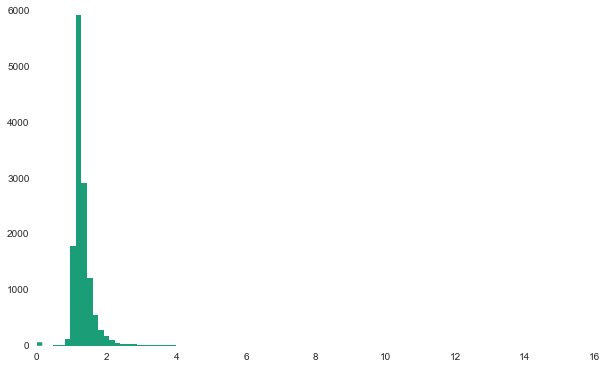

In [50]:
%%time

trip_full_df['tip_amount'] = trip_full_df['tip_amount'].astype(float)
trip_full_df.groupby('medallion')['tip_amount'].mean().hist(bins=100)
trip_full_df.groupby('medallion')['tip_amount'].mean().sort_values(ascending=False).head()

In [54]:
trip_full_df.head()

medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01-06 00:22:54                1                259            1.5   
2  2013-01-05 18:54:23                1                282            1.1   
3  2013-01-07 23:58:20                2                244            0.7   
4  2013-01-07 23:34:24                1                560            2.1   

       ...       mta_tax  tip_amount  tolls_amount  total_amount pickup_hour  \
0      ...           0.5         0.0           0.0           7.0          15   
1      ...           0.5         0.0           0.0           7.0           0   
2      ...           0.5         0.0           0.0           7.0          18   
3      ...           0.5         0.0           0.0           6.0          23   
4      ...           0.5         0.0           0.0          10.5          23   

   dropoff_hour  pickup_wday  pickup_day   full_date  tip_fraction  
0            15            1     Tuesday  2013-01-01           0.0  
1             0            6      Sunday  2013-01-06           0.0  
2            18            5    Saturday  2013-01-05           0.0  
3            23            0      Monday  2013-01-07           0.0  
4            23            0      Monday  2013-01-07           0.0  

[5 rows x 27 columns]

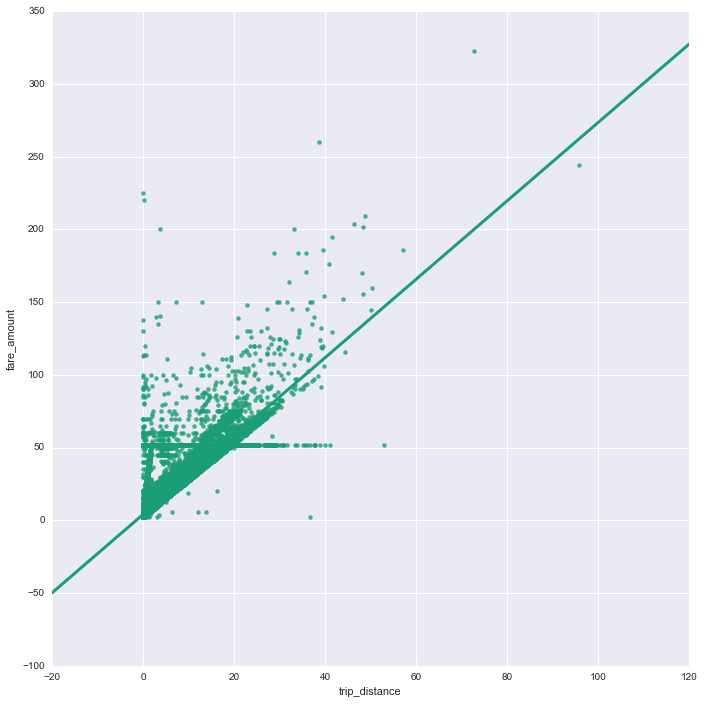

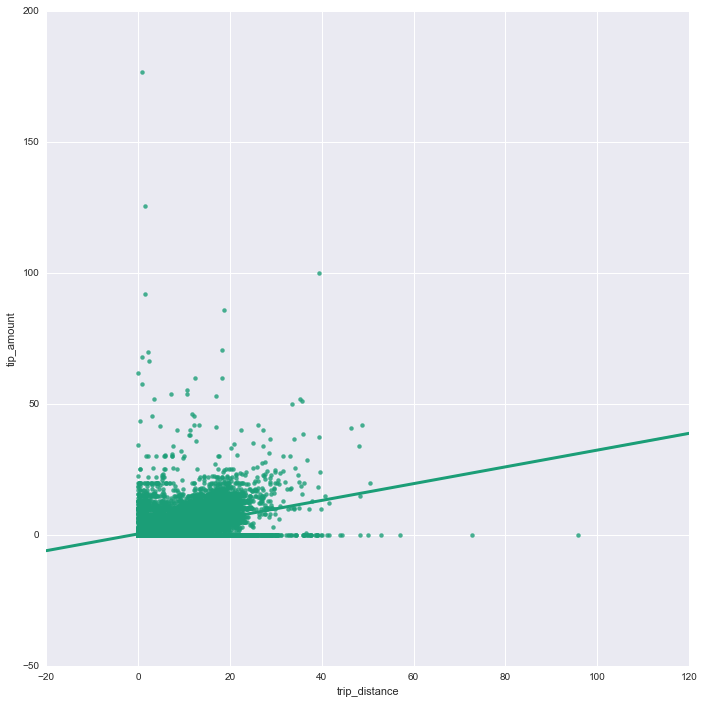

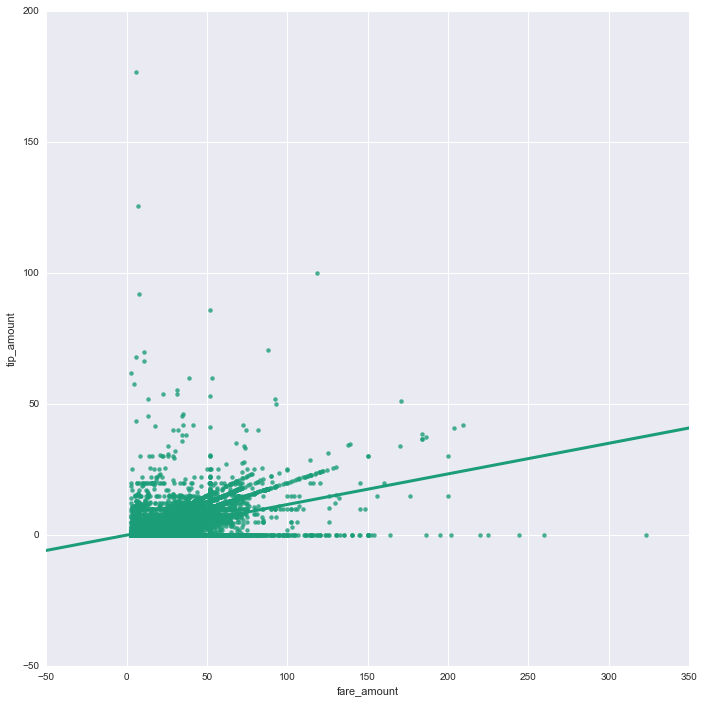

In [56]:
trip_full_df['trip_distance'] = trip_full_df['trip_distance'].astype(float)
trip_full_df['fare_amount'] = trip_full_df['fare_amount'].astype(float)
trip_full_df['tip_amount'] = trip_full_df['tip_amount'].astype(float)
trip_full_df['total_amount'] = trip_full_df['total_amount'].astype(float)

fare_data_head = trip_full_df.head(500000)

import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

sns.lmplot('trip_distance', 'fare_amount', fare_data_head[fare_data_head.trip_distance > 0],size = 10)
sns.lmplot('trip_distance', 'tip_amount', fare_data_head[fare_data_head.trip_distance > 0],size = 10)
sns.lmplot('fare_amount', 'tip_amount', fare_data_head[fare_data_head.trip_distance > 0],size = 10)

In [ ]:
%%time

tip = trip_full_df[trip_full_df['medallion'] == '89D227B655E5C82AECF13C3F540D4CF4']['tip_amount']
print tip.count()

print "No of times no tip recorded = %d" %(tip[tip == 0].count())

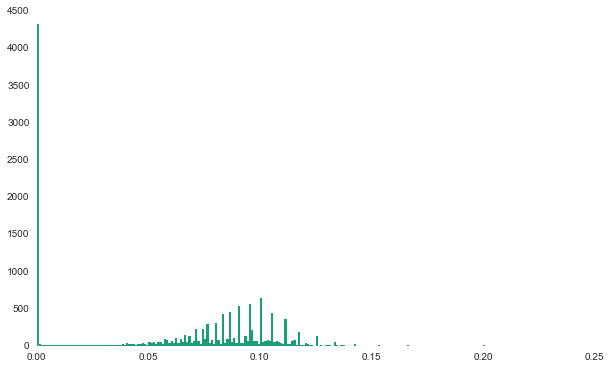

In [262]:
%%time

trip_full_df['tip_fraction'] = trip_full_df['tip_amount']/trip_full_df['fare_amount']
trip_full_df.groupby('medallion')['tip_fraction'].median().hist(bins=250)

Wall time: 1min 3s


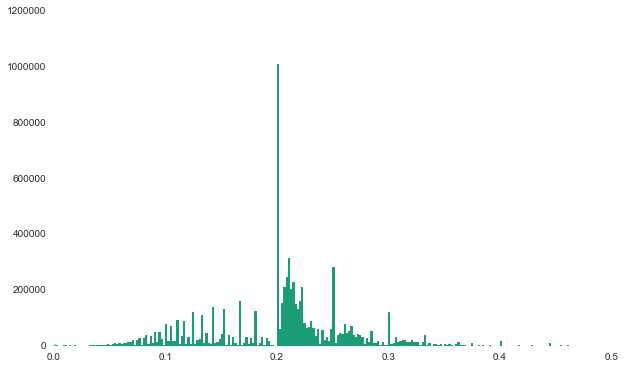

In [268]:
%%time

trip_full_df[(trip_full_df['tip_fraction'] > 0) & (trip_full_df['tip_fraction'] < 0.5)]['tip_fraction'].hist(bins=250)

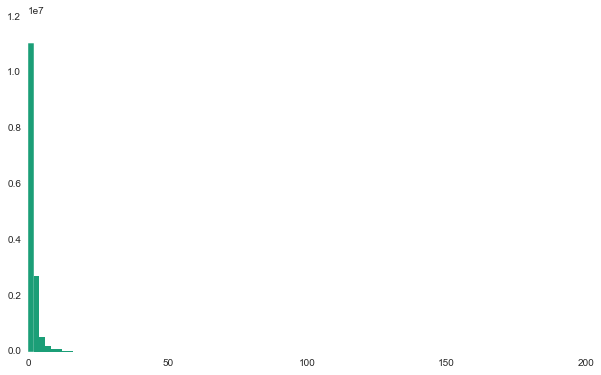

In [253]:
trip_full_df['tip_amount'].hist(bins=100)

In [81]:
trip_full_df['tip_amount'].describe()

count    1.477662e+07
mean     1.267509e+00
std      2.046084e+00
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e-01
75%      2.000000e+00
max      2.000000e+02
Name: tip_amount, dtype: float64

Wall time: 17min 21s


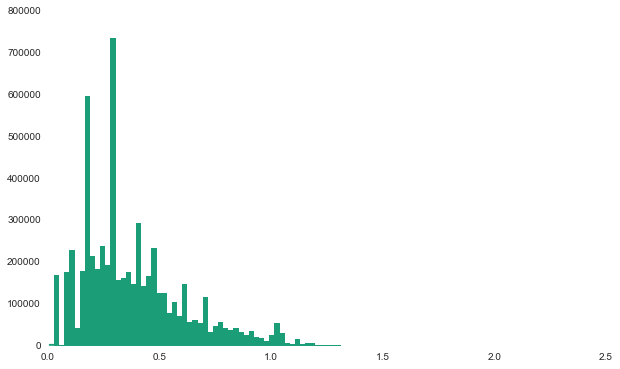

In [249]:
%%time

trip_full_df['tip_amount_log'] = trip_full_df['tip_amount'].apply(np.log10)

trip_full_df[trip_full_df['tip_amount_log'] > 0]['tip_amount_log'].hist(bins=100)

In [250]:
trip_full_df.head()

medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-01-01 15:11:48   
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-01-01 15:18:10                4                382            1.0   
1  2013-01-06 00:22:54                1                259            1.5   
2  2013-01-05 18:54:23                1                282            1.1   
3  2013-01-07 23:58:20                2                244            0.7   
4  2013-01-07 23:34:24                1                560            2.1   

        ...        mta_tax  tip_amount  tolls_amount  total_amount  \
0       ...            0.5         0.0           0.0           7.0   
1       ...            0.5         0.0           0.0           7.0   
2       ...            0.5         0.0           0.0           7.0   
3       ...            0.5         0.0           0.0           6.0   
4       ...            0.5         0.0           0.0          10.5   

  pickup_hour  dropoff_hour  pickup_wday  pickup_day   full_date  \
0          15            15            1     Tuesday  2013-01-01   
1           0             0            6      Sunday  2013-01-06   
2          18            18            5    Saturday  2013-01-05   
3          23            23            0      Monday  2013-01-07   
4          23            23            0      Monday  2013-01-07   

   tip_amount_log  
0            -inf  
1            -inf  
2            -inf  
3            -inf  
4            -inf  

[5 rows x 27 columns]

In [255]:
trip_full_df.head(50000).replace([np.inf, -np.inf], np.nan).dropna(subset=['tip_amount_log'], how="all")

medallion                      hack_license  \
157    F6F7D02179BE915B23EF2DB57836442D  088879B44B80CC9ED43724776C539370   
158    BE386D8524FCD16B3727DCF0A32D9B25  4EB96EC9F3A42794DEE233EC8A2616CE   
159    E9FF471F36A91031FE5B6D6228674089  72E0B04464AD6513F6A613AABB04E701   
161    A5D125F5550BE7822FC6EE156E37733A  08DB3F9FCF01530D6F7E70EB88C3AE5B   
163    EE1513D432B07F7E0B5E2ED1EF629086  F31D261881520931062C011366E56A04   
166    34191B0F711962DA5405CF75A7D520DD  037AEA184D39DEE88D5A1026BAB7F3A0   
171    8B17A20F99817F9751EE8683E43B712E  DF72C57F328509CC364656C94021B9B9   
174    942EDD26C4E3337133058C095AD23289  B3AE7651824A314746131C8187B20783   
176    F1C63842BC47D1C30A1317560F24FD38  9D0A6E44AF6C07CD7C55792C2E5B44BE   
179    CEBDF09A60BF166DF41F860742D4D4E1  286430A4C250827AFD37CB33908C99DA   
183    99274EDFA48DDA7B024A6B8BCA19EAE0  F1F0BF6913FAE17744D8B8B1FAEA5363   
189    BDC69EC6520DC5DC23EFF840507721E6  00711D0CC3FB5BC905BB62D9B62296D6   
190    A2B97CECFEA4C8DE45D8FC251E80AF1D  68AE01DDBDEDDFF772905561744A1072   
191    8D6F8CB4DA080C3726BE8D3996254986  14A088229C693E1B173BE3C33873F448   
192    D111EEC901448CEE65D1DF98F4E3CE10  8962F17FAA0A29BF05C4660AA4F4E514   
194    3A00BD8BD96A8EFF2BFE18FE274D8A2D  ABC926370E8515A8263F96D2F4E0218E   
196    E097412FE23295A691BEEE56F28FB9E2  D5AA0CEA2DB7D2F3C8C2A49FA629769A   
197    A6ECECBAC944333366E2F759845B1639  B7A0F269A0A9AD6EF35B985D315C4AA2   
200    A5179D5A72336EEDFDF90C60CAE1EA6F  CF60B7EA381C66092FC1AC19D67B2D30   
202    24A4654986C011AE6980FD9566014EDB  C6A6B2BBBEE3B7F5EF8644142B2EC46E   
208    71A788D349C8206115457A1574A006A2  5CBC54D8741AC9A90F18DE2E886561F5   
209    5C9E006BB8CCE89ACC23D40236AD5D8B  1332EE9D10FC884EE767145EFEB03542   
210    8AC3BD56C4BBE09B58D0E225F62F3F9D  F37A4403C6787381D6108F0B6DDFE687   
212    80387D83069DB6EDECD1E27B9E3A8895  C8CEA236281433CEA6092B109C7B1B08   
217    84C5F6C940C24C55D8D7C75F3F75F14F  D48C1097AF78B31964D8DE00A4A71AC2   
218    D7DB65DF378CBC004BC9B41D223AAADF  69D19CD8ADCAA46F9B8AF942D3F67C31   
219    A0DEAEC3D5592AE94B876356F12F8158  6A35995FBD5399AB131B89623C344782   
221    5E6E7449087DF76AD2B6B630018A0804  5A8E40B1421D8A5E507C01F02778F389   
222    ADDB6F51BFFAFA8603840526A7923A51  93052C01A5C67ACDDB265D7038CB3B44   
225    7AD442D7CFA8B1D9FB63C37B0BD0C45C  98ADAC002020737F02CD25343C6062A1   
...                                 ...                               ...   
49937  6D1F3B94E85A5BBD70265D891B1BFB43  7CCF6DBC23DD18A25EF48965857096FA   
49938  D1F80808FCF8729A071C6A4A65078DB7  9873E7AD6793286639F9D7EEEC98F9A4   
49940  50C6E9C9DEEC48A18273D57C325778B0  BB4DCD2FD883B6EB067A2887295CE7BC   
49942  7659EF787C81BCE8C6B0C012E3A03B7E  D1B0A49E5B8956C4F4F3162880A6C6FF   
49948  DCBE7ED305C0C9962E57269646256836  BEC1EB48C18AFCD9B4646C63D59342C1   
49950  1FEF6248184207A37D8269071CA74767  6AB7DE6507AFD6C6C587483449074562   
49951  3F38E295118F0BFFEF93ED81A5EFB47D  B594C2B592CCFBB90EE941FDD5CE0C91   
49954  DC5E77F0EB9C47AF5467054E98231939  4B92942DA64AE85B2232015710749805   
49956  336BA50C7725399650CD901EEA8C3173  6AF7F4DA758784371EB8AB3FDFDE6337   
49957  97A12ACC40B7F500B40A311820DCF882  428AE5AF18511D16BCF743FC095B5881   
49961  F98DB516472D0C0350B6667CCFD2F4B2  43E31DE53585CD3A7AA8AD000F249EB9   
49962  4F896A7C32B8A2394C87F1A9129294FD  5B1EC1BD95376DC8AACD6974ED92BEEB   
49964  9DA551A90D57782C1F53DDCF86E2FF3D  F2758C9EBF1925B5642A45234076E8FC   
49967  D0F178CFCE3C715E967FEC517E6785B4  87F3ADF098B1D4A12CDB240FD866F48A   
49969  1D73FA23ECBE1DC4F4E747A8457B37FE  139B54EE105F95556DF6DDCBD907B1E0   
49970  C382A4F21BAE10FFFFDDE46A6053A239  0DF1F7D15120629DB981156051ACE3AB   
49971  1E382090C15DF8B41B5D221A60958733  6DC841A5F028073A75BD0F570AB57035   
49973  B206424981444F723E0C7945742E22B9  1D3405E1744B9C93034A9A49781CC19F   
49977  D796EED505FE96C591232180B593A21B  FD77F0854D077613051A042D0B996602   
49978  3A2D74DDF4AC7C3E1FA803AE9468F97E  FDF38AF9ADF2465C3A116E195D812965   
49979  18E80475A4E491022BC

In [252]:
trip_full_df['tip_amount_log'].describe()

count    1.477662e+07
mean             -inf
std               NaN
min              -inf
25%              -inf
50%     -9.691001e-02
75%      3.010300e-01
max      2.301030e+00
Name: tip_amount_log, dtype: float64

### Extracting essential columns from the complete dataset

After completing the data munging and feature engineering steps on the sample dataset, we can perform the same steps for the complete dataset. For this, we first extract the essential columns from the complete dataset which can help us identify each record along with containing the pickup location information.

In [236]:
%%time

trip_full_df_filt = trip_full_df[(trip_full_df.pickup_latitude >= 40.7) & (trip_full_df.pickup_latitude <= 40.8) &\
                (trip_full_df.pickup_longitude >= -74.05) & (trip_full_df.pickup_longitude <= -73.8) &\
                                (trip_full_df.dropoff_latitude >= 40.7) & (trip_full_df.dropoff_latitude <= 40.8) &\
                (trip_full_df.dropoff_longitude >= -74.05) & (trip_full_df.dropoff_longitude <= -73.8)]

Wall time: 17min 22s


In [237]:
trip_full_df_filt.describe()

rate_code  passenger_count  trip_time_in_secs  trip_distance  \
count  1.292629e+07     1.292629e+07       1.292629e+07   1.292629e+07   
mean   1.010779e+00     1.696450e+00       6.205129e+02   2.212980e+00   
std    2.567277e-01     1.362230e+00       4.005715e+02   2.134945e+00   
min    0.000000e+00     0.000000e+00       0.000000e+00   0.000000e+00   
25%    1.000000e+00     1.000000e+00       3.450000e+02   1.000000e+00   
50%    1.000000e+00     1.000000e+00       5.400000e+02   1.600000e+00   
75%    1.000000e+00     2.000000e+00       8.040000e+02   2.640000e+00   
max    2.100000e+02     9.000000e+00       1.080000e+04   1.000000e+02   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      1.292629e+07     1.292629e+07       1.292629e+07      1.292629e+07   
mean      -7.397919e+01     4.075261e+01      -7.397811e+01      4.075264e+01   
std        2.301049e-02     2.002335e-02       2.401632e-02      2.070182e-02   
min       -7.404999e+01     4.070000e+01      -7.404999e+01      4.070000e+01   
25%       -7.399241e+01     4.073875e+01      -7.399190e+01      4.073867e+01   
50%       -7.398238e+01     4.075418e+01      -7.398164e+01      4.075446e+01   
75%       -7.397028e+01     4.076675e+01      -7.396906e+01      4.076709e+01   
max       -7.380000e+01     4.080000e+01      -7.380000e+01      4.080000e+01   

        fare_amount     surcharge       mta_tax    tip_amount  tolls_amount  \
count  1.292629e+07  1.292629e+07  1.292629e+07  1.292629e+07  1.292629e+07   
mean   1.004362e+01  3.206462e-01  4.993929e-01  1.101648e+00  1.252949e-01   
std    6.303786e+00  3.711641e-01  1.741150e-02  1.576603e+00  7.855329e-01   
min    2.500000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.000000e+00  0.000000e+00  5.000000e-01  0.000000e+00  0.000000e+00   
50%    8.500000e+00  0.000000e+00  5.000000e-01  8.000000e-01  0.000000e+00   
75%    1.200000e+01  5.000000e-01  5.000000e-01  1.800000e+00  0.000000e+00   
max    5.000000e+02  1.250000e+01  5.000000e-01  2.000000e+02  2.000000e+01   

       total_amount   pickup_hour  dropoff_hour   pickup_wday  
count  1.292629e+07  1.292629e+07  1.292629e+07  1.292629e+07  
mean   1.209060e+01  1.365700e+01  1.367446e+01  2.953411e+00  
std    7.673299e+00  6.273203e+00  6.326187e+00  1.889059e+00  
min    2.500000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    7.500000e+00  9.000000e+00  9.000000e+00  1.000000e+00  
50%    1.000000e+01  1.400000e+01  1.400000e+01  3.000000e+00  
75%    1.400000e+01  1.900000e+01  1.900000e+01  5.000000e+00  
max    6.500000e+02  2.300000e+01  2.300000e+01  6.000000e+00

In [266]:
print trip_full_df_filt.columns
print trip_full_df_filt.shape

Index([u'medallion', u'hack_license', u'vendor_id', u'rate_code',
       u'store_and_fwd_flag', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'trip_time_in_secs', u'trip_distance',
       u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',
       u'dropoff_latitude', u'payment_type', u'fare_amount', u'surcharge',
       u'mta_tax', u'tip_amount', u'tolls_amount', u'total_amount',
       u'pickup_hour', u'dropoff_hour', u'pickup_wday', u'pickup_day',
       u'full_date'],
      dtype='object')
(12926288, 26)


In [242]:
%%time

trip_full_essential = pd.read_csv('../nyc_taxi_files/2013_Jan_essential.csv')

Wall time: 2min 7s


In [246]:
trip_full_essential.columns

Index([u'medallion', u'hack_license', u'vendor_id', u'pickup_datetime',
       u'pickup_latitude', u'pickup_longitude'],
      dtype='object')

In [247]:
%%time

trip_full_essential_filt = trip_full_df_filt[['medallion','hack_license','vendor_id','pickup_datetime','pickup_latitude','pickup_longitude',\
                                             'dropoff_latitude','dropoff_longitude']]

Wall time: 20.1 s


In [248]:
%%time

trip_full_essential_filt.to_csv('../nyc_taxi_files/2013_Jan_full_essential_filt.csv',index=False)

Wall time: 2min 7s
